In questo notebook è contenuto parte del lavoro di tirocinio e tesi di Giorgio Olivieri per il corso di laurea magistrale in Ingegneria Gestionale "Digitalizzazione e analisi dell'informazione aziendale " UNIVPM

Di seguito si riportano le varie fasi dell'analisi di alcuni dei dataset indicati nei vari documenti.

CARICAMENTO DEI DATI

In questa prima parte i dataset vengono letti.Questi sono stati caricati nel Drive personale di google: per leggerli è necessario eseguire la seconda cella in modo da effettuare il montaggio del drive. In questo modo Colab potrà direttamente avere accesso

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
import numpy as np

In [2]:
#serve per effettuare il montaggio di google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#inizio a leggere i vari dataset

#dal dataset reperibile al link : https://www.kaggle.com/datasets/tylerhartshorn/residential-solar-vs-weather-nc-usa?select=Weather_and_energy_Final_2020_2021.csv
solar = pd.read_csv('/content/drive/MyDrive/DatasetTesiTirocinio/Weather_and_energy_Final_2020_2021.csv') #dati su energia e condizioni meteo
total = pd.read_csv('/content/drive/MyDrive/DatasetTesiTirocinio/Panel_Monthly_totals_2020_2021.csv') #dati aggregati

ANALISI ESPLORATIVA

In questa fase i dati vengono esploarati tramite varie tecniche di visualizzazione al fine da comprenderne meglio la struttura

In [ ]:
solar.head()

Name Date time  Energy Discharged (Wh)  \
0  Black Mountain, NC 28711, United States  2/1/2020                    9929   
1  Black Mountain, NC 28711, United States  2/2/2020                   24392   
2  Black Mountain, NC 28711, United States  2/3/2020                   16943   
3  Black Mountain, NC 28711, United States  2/4/2020                    2103   
4  Black Mountain, NC 28711, United States  2/5/2020                    1908   

   Maximum Temperature  Minimum Temperature  Temperature  Wind Chill  \
0                 48.5                 34.1         39.2        32.0   
1                 65.1                 32.8         45.5        28.1   
2                 69.5                 32.3         50.5        29.1   
3                 61.1                 50.8         55.2         NaN   
4                 59.6                 54.2         56.5         NaN   

   Heat Index  Precipitation  Snow  Snow Depth  Wind Speed  Wind Direction  \
0         NaN           0.04   0.0         0.0         7.5          245.83   
1         NaN           0.00   0.0         0.0         8.8          235.00   
2         NaN           0.00   0.0         0.0         6.6           65.00   
3         NaN           0.00   0.0         0.0         7.1          153.48   
4         NaN           0.52   0.0         0.0        11.3          159.13   

   Wind Gust  Visibility  Cloud Cover  Relative Humidity  \
0        NaN         5.9         34.2              85.64   
1       20.8         9.9          1.9              54.15   
2        NaN         9.9          0.0              54.81   
3       16.1         9.9         38.6              62.09   
4       29.8         7.8         47.5              91.36   

               Conditions  
0  Rain, Partially cloudy  
1                   Clear  
2                   Clear  
3        Partially cloudy  
4  Rain, Partially cloudy

In [ ]:
solar.describe()

Energy Discharged (Wh)  Maximum Temperature  Minimum Temperature  \
count              393.000000           393.000000           393.000000   
mean             17548.552163            65.034860            46.471501   
std               7946.599926            14.894287            14.770230   
min                 58.000000            24.900000            11.900000   
25%              11112.000000            53.700000            33.300000   
50%              19093.000000            66.400000            45.700000   
75%              24008.000000            77.900000            60.900000   
max              31885.000000            89.400000            70.900000   

       Temperature  Wind Chill  Heat Index  Precipitation        Snow  \
count   393.000000  187.000000   78.000000     393.000000  393.000000   
mean     55.134351   32.131551   85.843590       0.177557    0.032875   
std      14.024123   10.379722    3.165257       0.416905    0.176037   
min      19.200000   -1.700000   79.900000       0.000000    0.000000   
25%      44.100000   24.950000   83.325000       0.000000    0.000000   
50%      55.300000   31.500000   85.750000       0.000000    0.000000   
75%      68.200000   41.200000   88.100000       0.140000    0.000000   
max      78.000000   49.300000   93.000000       3.190000    2.330000   

       Snow Depth  Wind Speed  Wind Direction   Wind Gust  Visibility  \
count  393.000000  393.000000      393.000000  208.000000  393.000000   
mean     0.063893    8.737405      182.546209   26.619231    8.988041   
std      0.278237    3.206069       83.860883    7.500532    1.183834   
min      0.000000    3.400000       11.000000   16.100000    3.800000   
25%      0.000000    6.300000      115.830000   20.800000    8.300000   
50%      0.000000    8.100000      162.170000   24.200000    9.500000   
75%      0.000000   10.700000      247.290000   32.200000    9.900000   
max      2.360000   20.200000      349.290000   51.200000    9.900000   

       Cloud Cover  Relative Humidity  
count   393.000000         393.000000  
mean     22.194911          74.889491  
std      15.500175          13.471314  
min       0.000000          29.110000  
25%       9.400000          67.030000  
50%      20.600000          77.640000  
75%      33.900000          84.680000  
max      55.600000          99.060000

In [ ]:
total.head()

Date  Serial Number  Energy Production (Wh)  Serial Conversion
0  2/29/2020          64498                   23804                  8
1  2/29/2020          64713                   24125                  9
2  2/29/2020          77114                   23677                 14
3  2/29/2020          79643                   23691                  6
4  2/29/2020          80627                   23884                 11

In [ ]:
total.describe()

Serial Number  Energy Production (Wh)  Serial Conversion
count     195.000000              195.000000         195.000000
mean    83637.933333            35425.712821           8.000000
std      8655.032900             6394.139710           4.331615
min     64498.000000            20302.000000           1.000000
25%     79643.000000            30119.000000           4.000000
50%     89854.000000            36501.000000           8.000000
75%     89971.000000            41726.000000          12.000000
max     90015.000000            43976.000000          15.000000

In [ ]:
plt.figure(figsize=(12, 6))
sns.pairplot(data=solar)
plt.title('Pairplot delle  features ')

Output hidden; open in https://colab.research.google.com to view.

In [4]:
numeric_columns = solar.select_dtypes(include=[np.number]) #prende solo i campi numerici, non quelli di tipo data o stringa

correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice dei coefficienti di correlazione ')
plt.show()

alcune rette di regressione per le principali correlazioni evidenziate

In [ ]:
numeric_columns.head()

Energy Discharged (Wh)  Maximum Temperature  Minimum Temperature  \
0                    9929                 48.5                 34.1   
1                   24392                 65.1                 32.8   
2                   16943                 69.5                 32.3   
3                    2103                 61.1                 50.8   
4                    1908                 59.6                 54.2   

   Temperature  Wind Chill  Heat Index  Precipitation  Snow  Snow Depth  \
0         39.2        32.0         NaN           0.04   0.0         0.0   
1         45.5        28.1         NaN           0.00   0.0         0.0   
2         50.5        29.1         NaN           0.00   0.0         0.0   
3         55.2         NaN         NaN           0.00   0.0         0.0   
4         56.5         NaN         NaN           0.52   0.0         0.0   

   Wind Speed  Wind Direction  Wind Gust  Visibility  Cloud Cover  \
0         7.5          245.83        NaN         5.9         34.2   
1         8.8          235.00       20.8         9.9          1.9   
2         6.6           65.00        NaN         9.9          0.0   
3         7.1          153.48       16.1         9.9         38.6   
4        11.3          159.13       29.8         7.8         47.5   

   Relative Humidity  
0              85.64  
1              54.15  
2              54.81  
3              62.09  
4              91.36

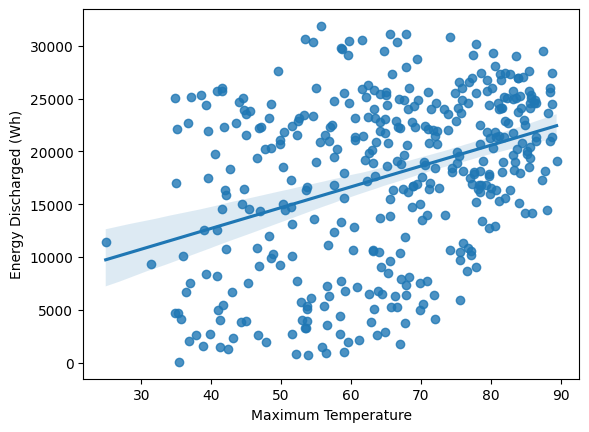

In [ ]:
ax = sns.regplot(x='Maximum Temperature', y='Energy Discharged (Wh)', data=numeric_columns, robust=True)

In [ ]:
ax = sns.regplot(x='Precipitation', y='Energy Discharged (Wh)', data=numeric_columns, robust=True)

In [ ]:
ax = sns.regplot(x='Visibility', y='Energy Discharged (Wh)', data=numeric_columns, robust=True)

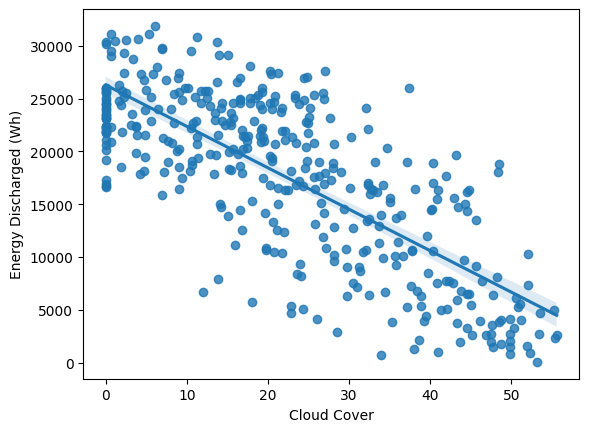

In [ ]:
ax = sns.regplot(x='Cloud Cover', y='Energy Discharged (Wh)', data=numeric_columns, robust=True)

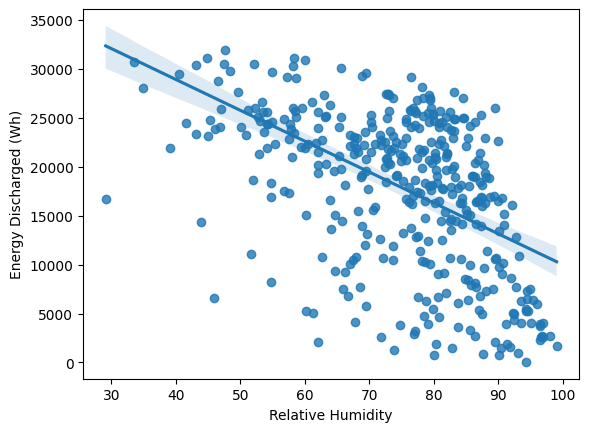

In [ ]:
ax = sns.regplot(x='Relative Humidity', y='Energy Discharged (Wh)', data=numeric_columns, robust=True)

ora alcune considerazioni statistiche

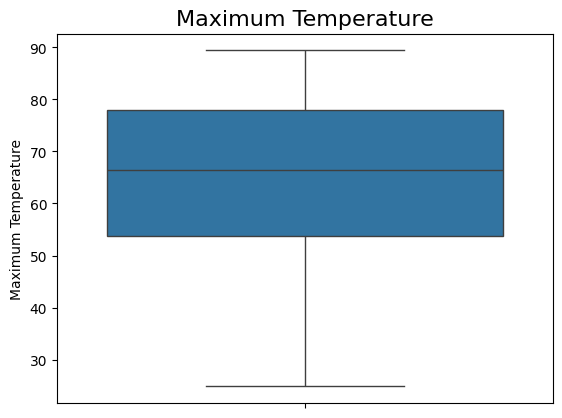

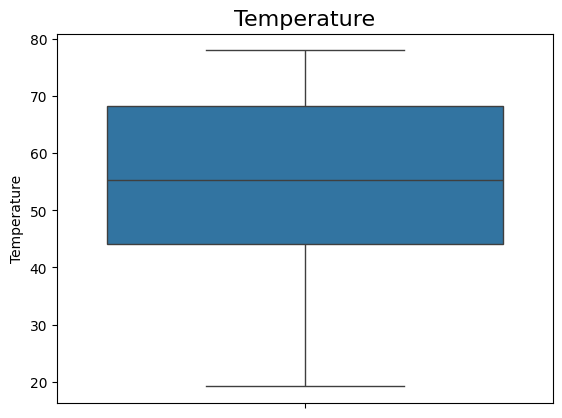

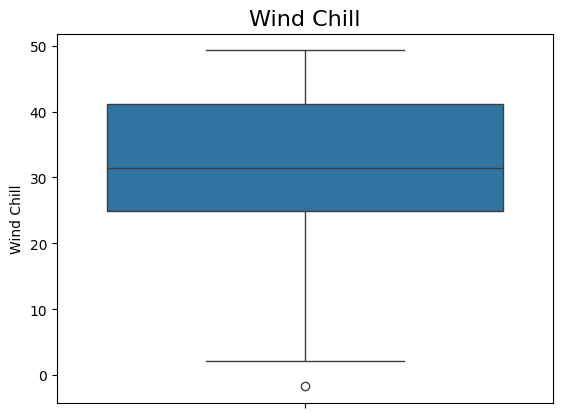

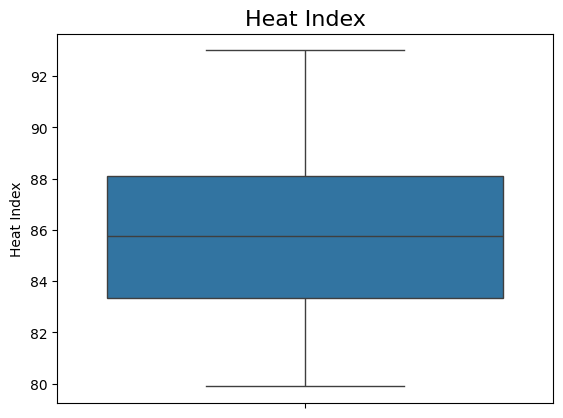

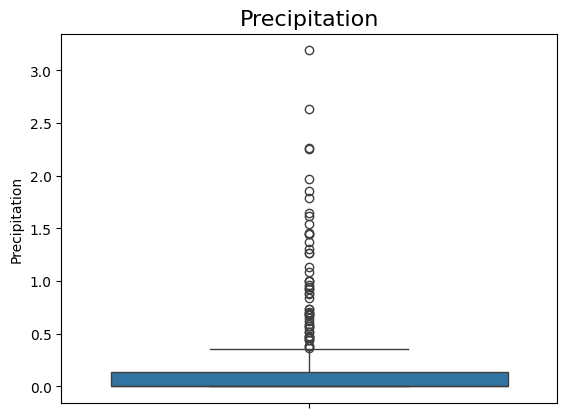

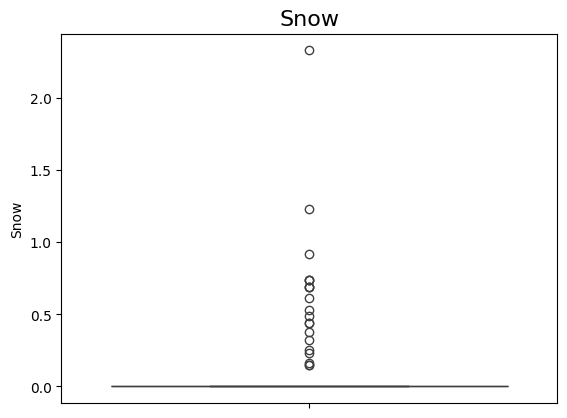

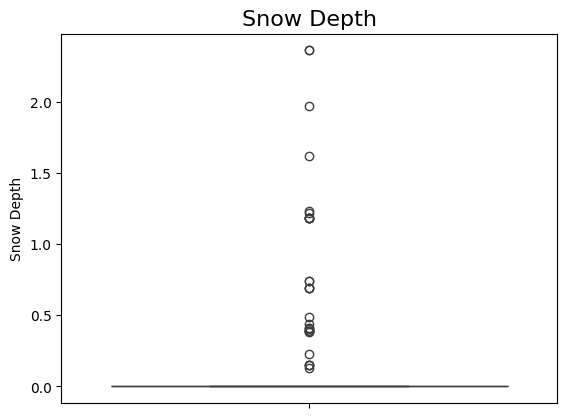

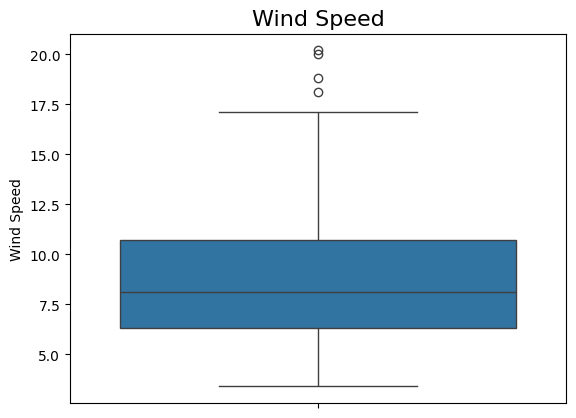

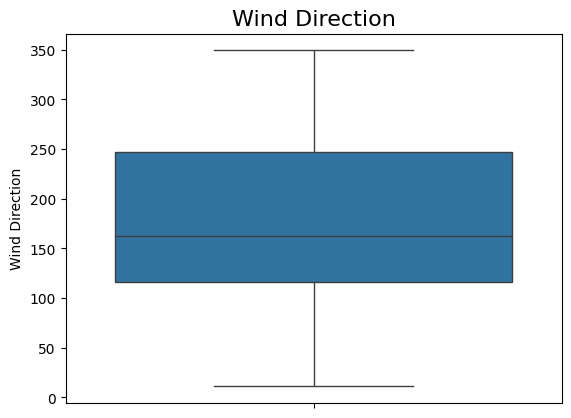

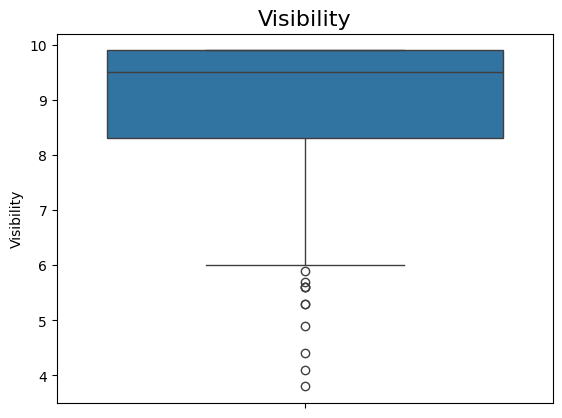

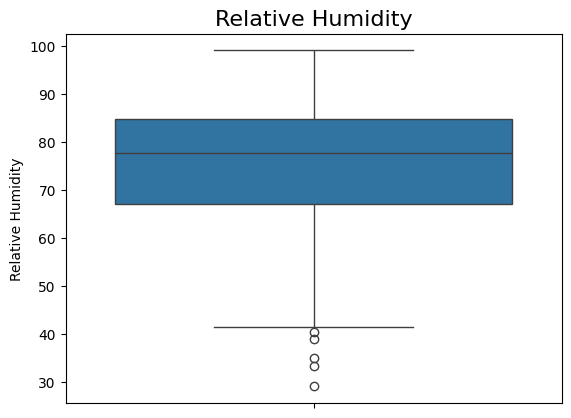

In [ ]:
#boxplot delle feature lo faccio con ciclo for per motivi grafici

for col in numeric_columns.columns :
       box_plot  = plt.subplots()
       box_plot = sns.boxplot(numeric_columns[col])
       plt.title(col, size=16)
       plt.show()

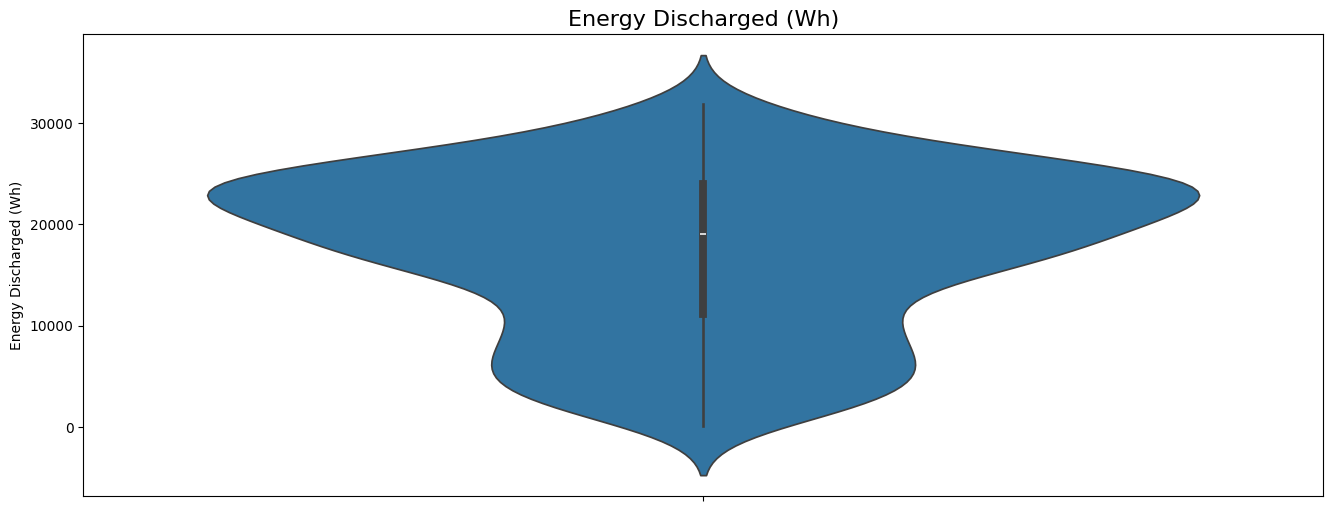

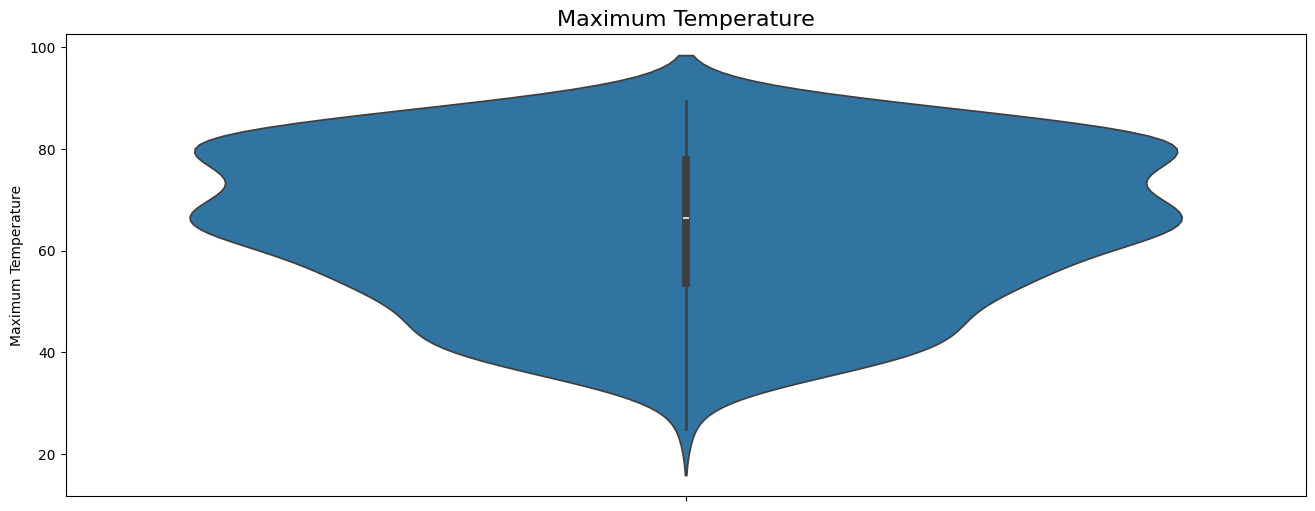

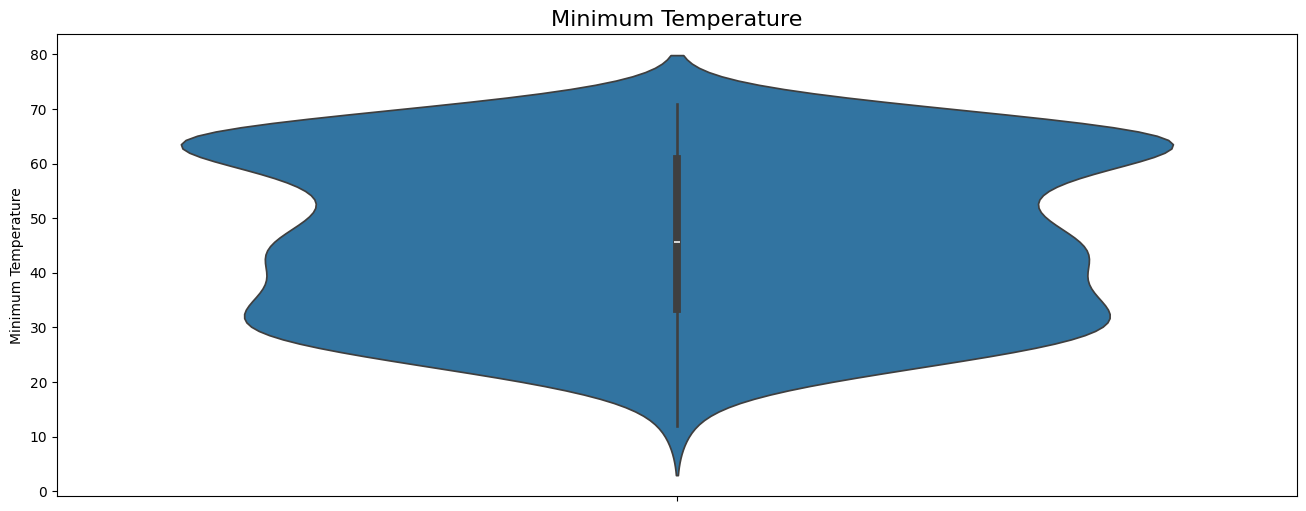

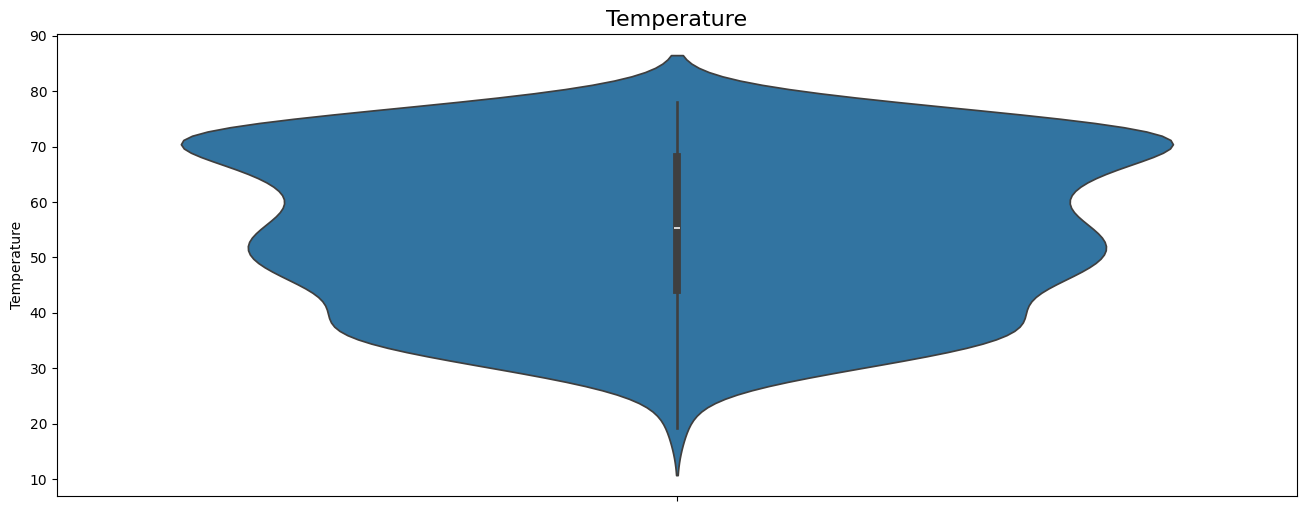

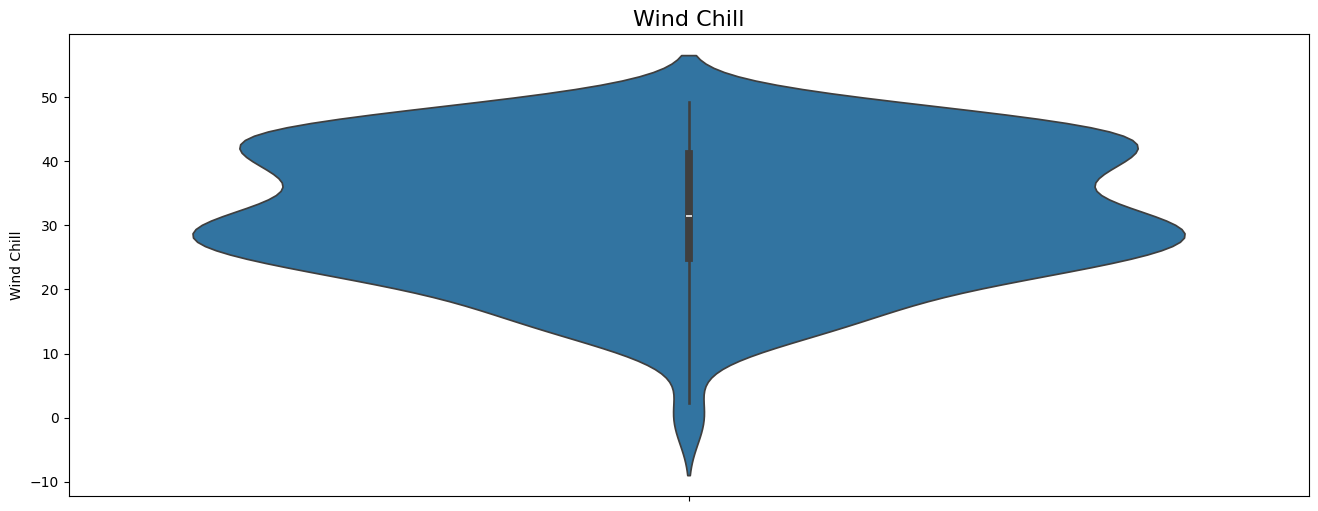

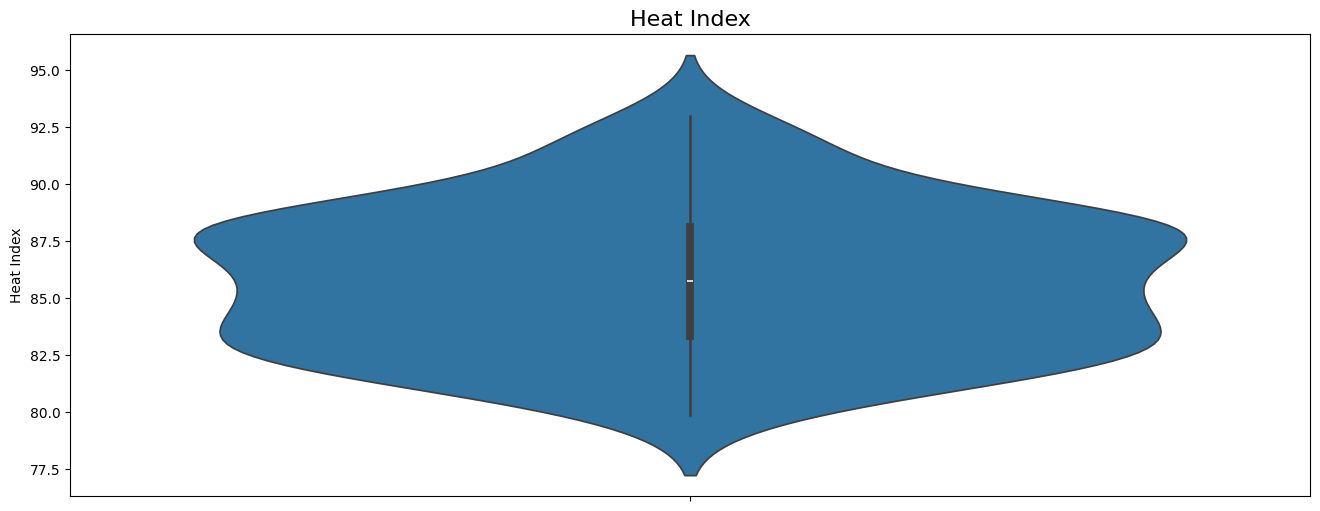

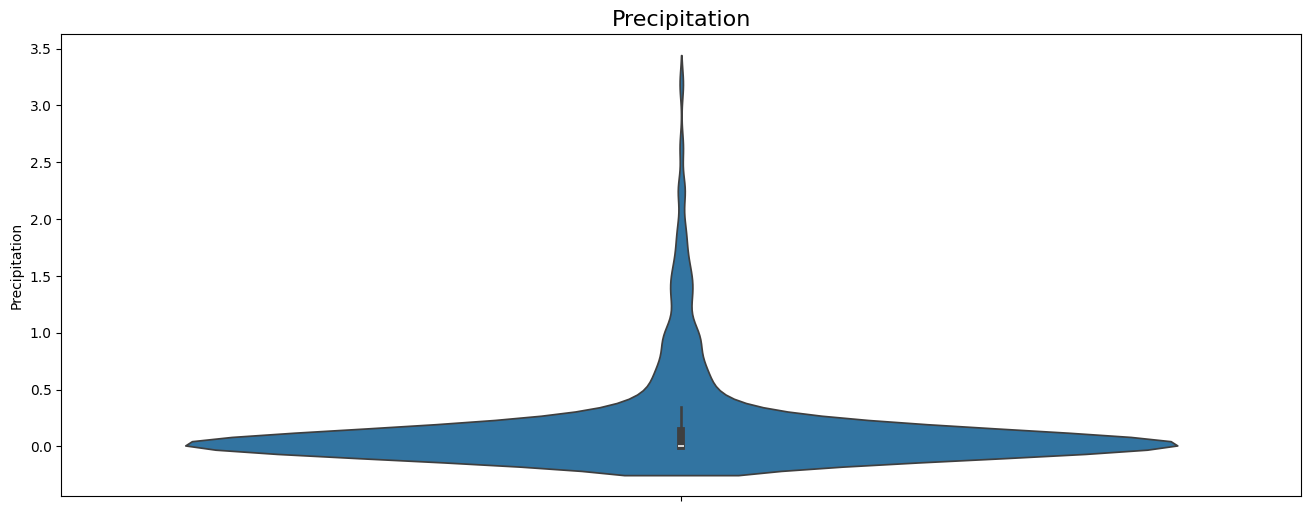

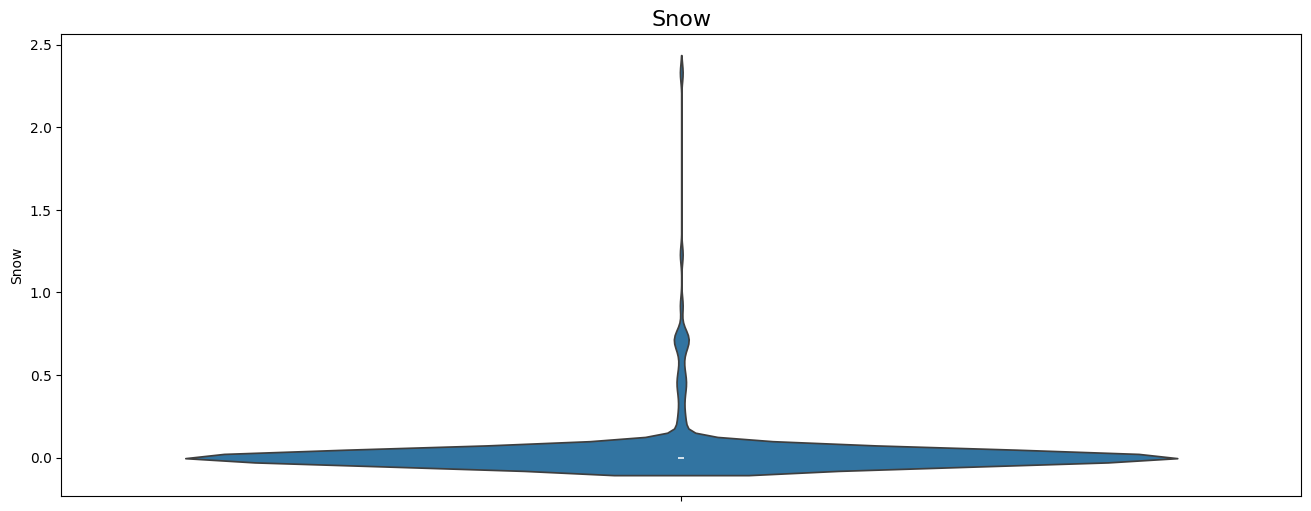

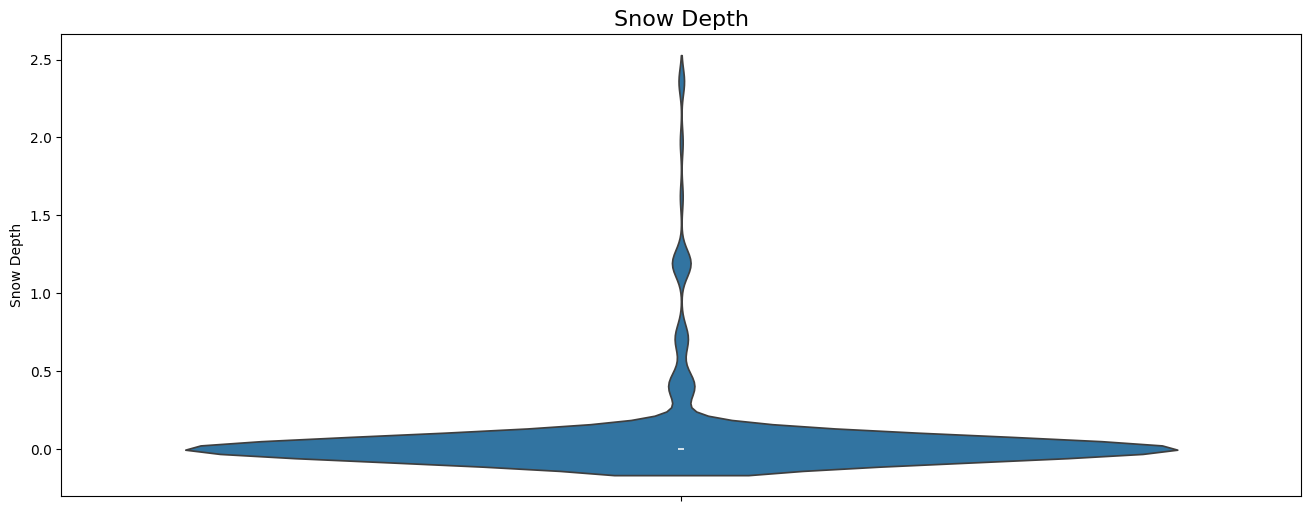

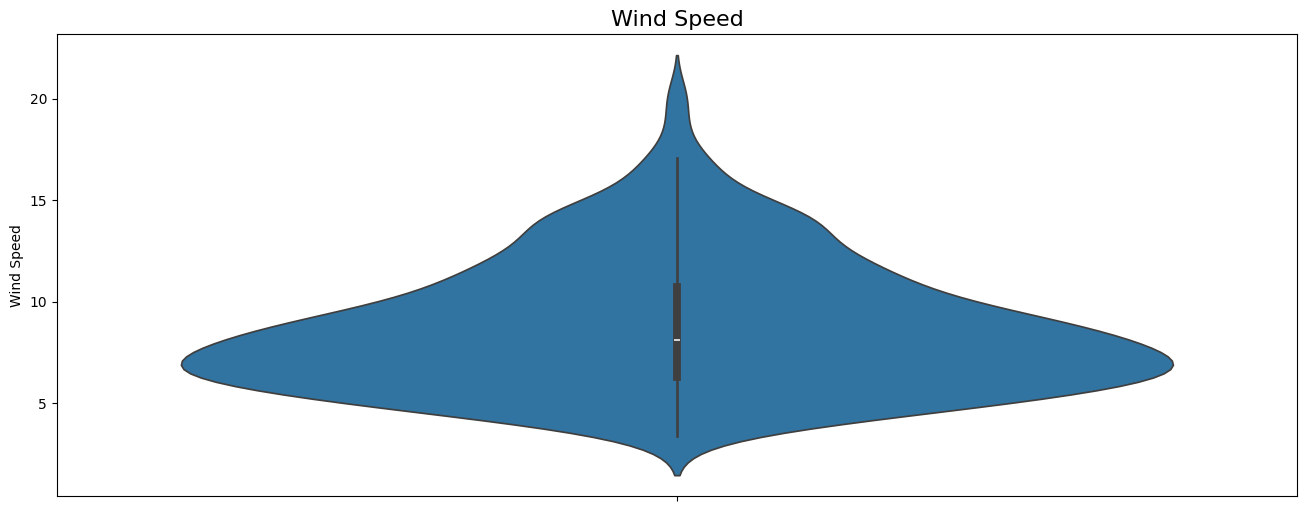

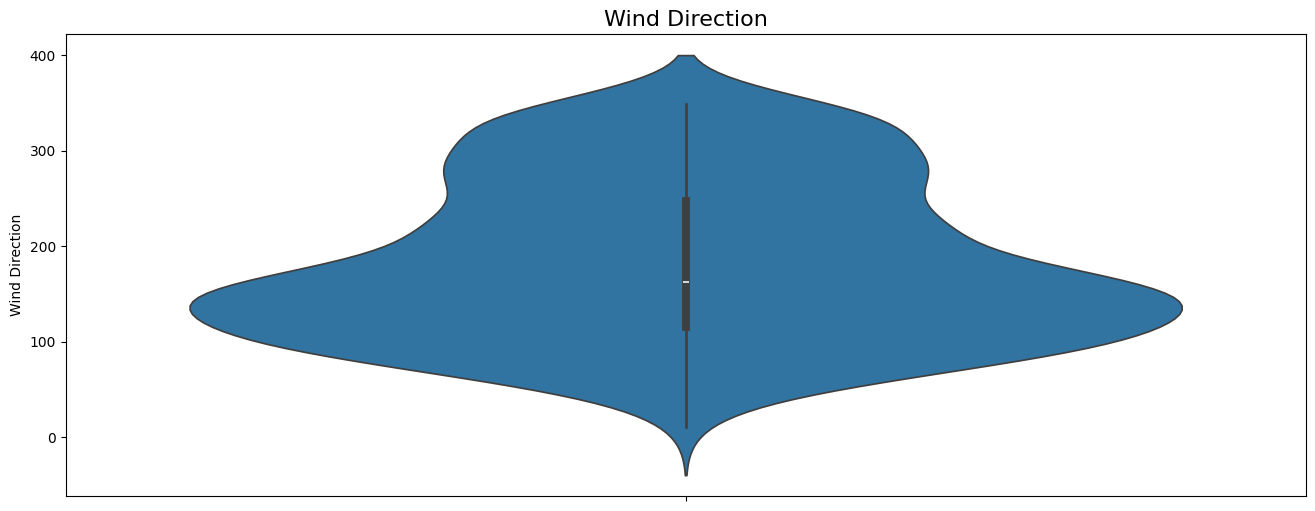

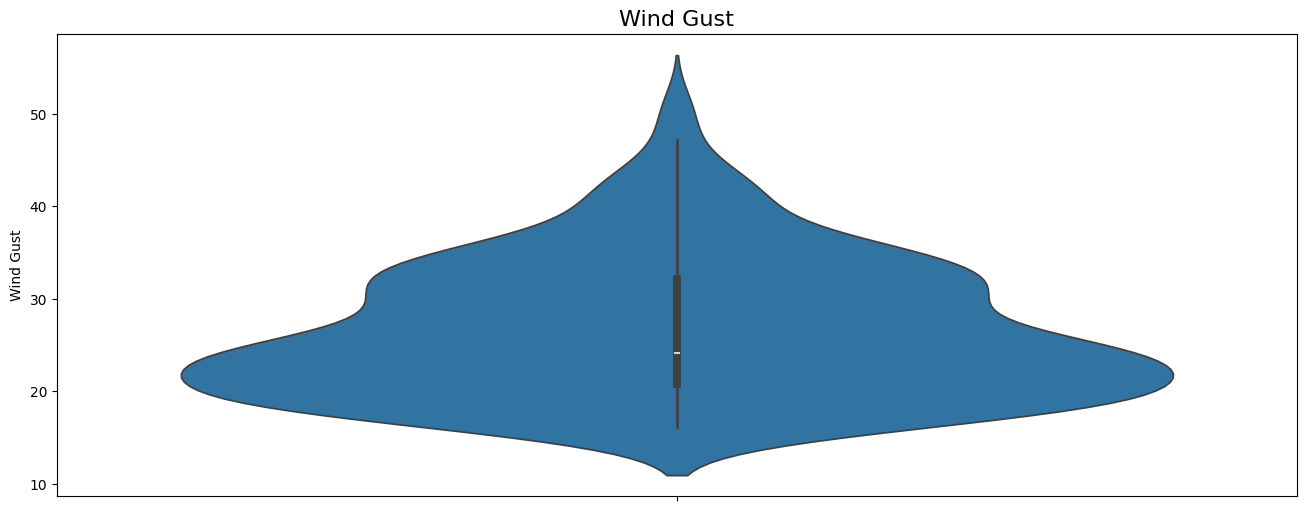

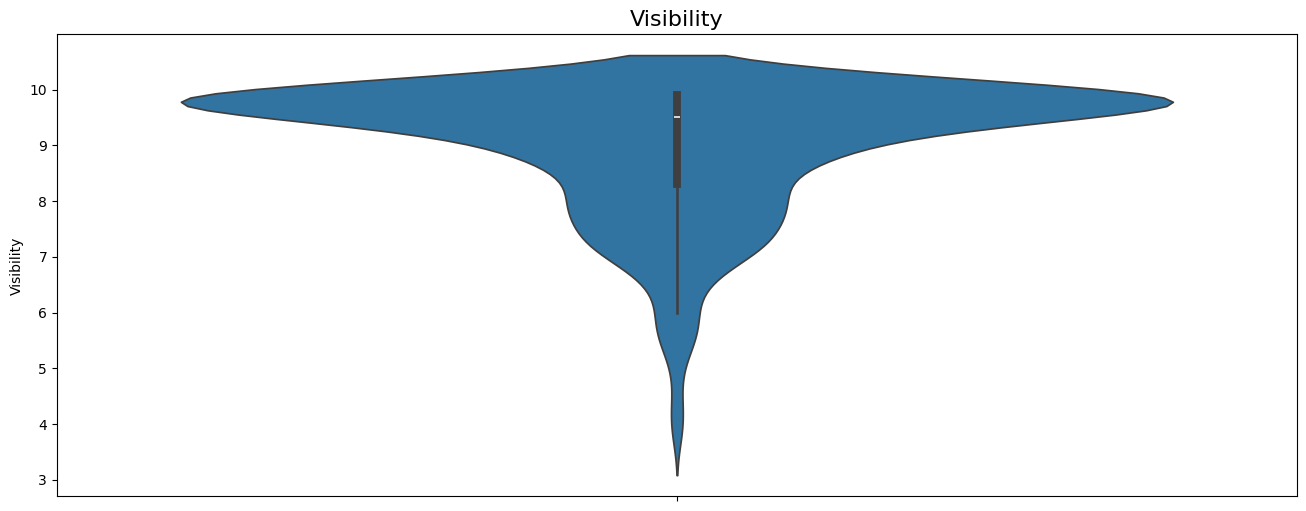

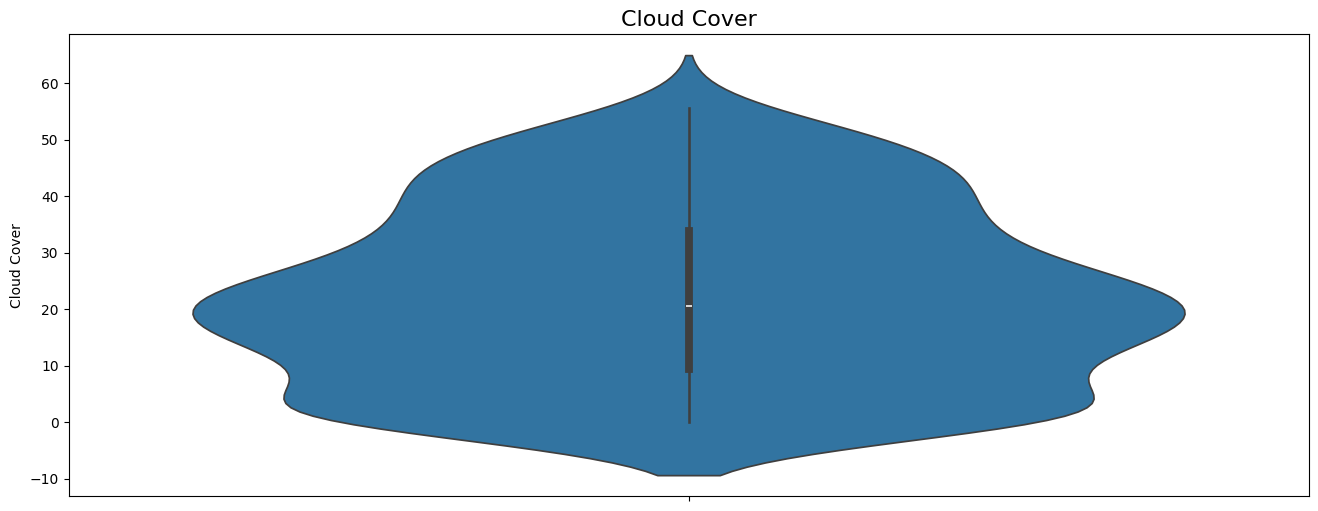

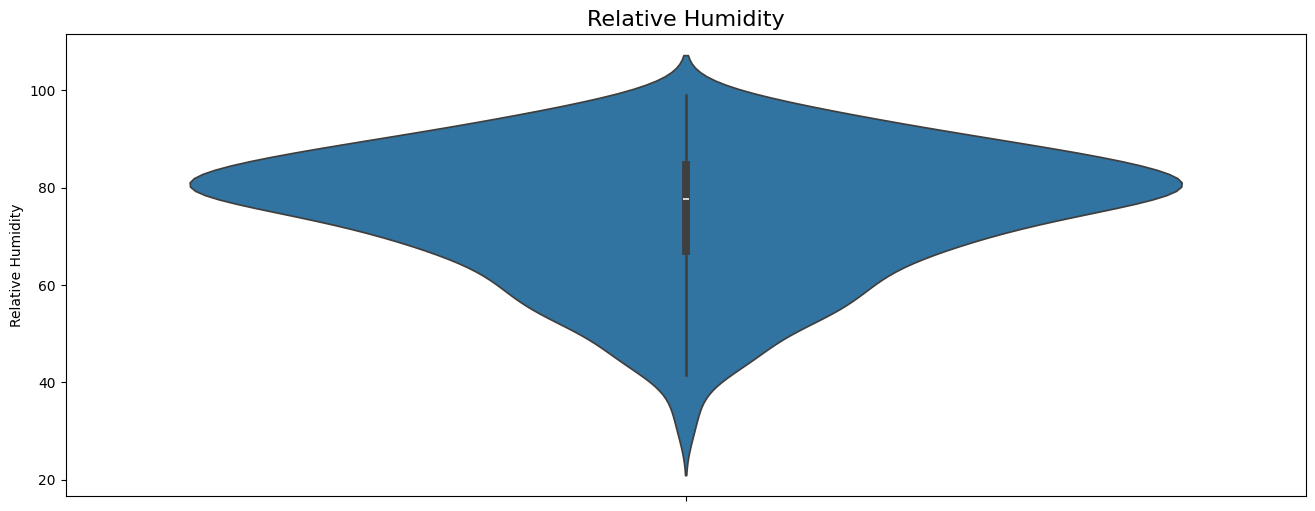

In [ ]:
#grafico a violino, che è un miglioramento del boxplot, con ciclo for per motivi grafici

for col in numeric_columns.columns:
        plt.figure(figsize=(16, 6))
        sns.violinplot(numeric_columns[col])
        plt.title(col, size=16)
        plt.show()

<ipython-input-11-bedf0e251299>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_columns['Energy Discharged (Wh)'], bins = 20, kde = True)


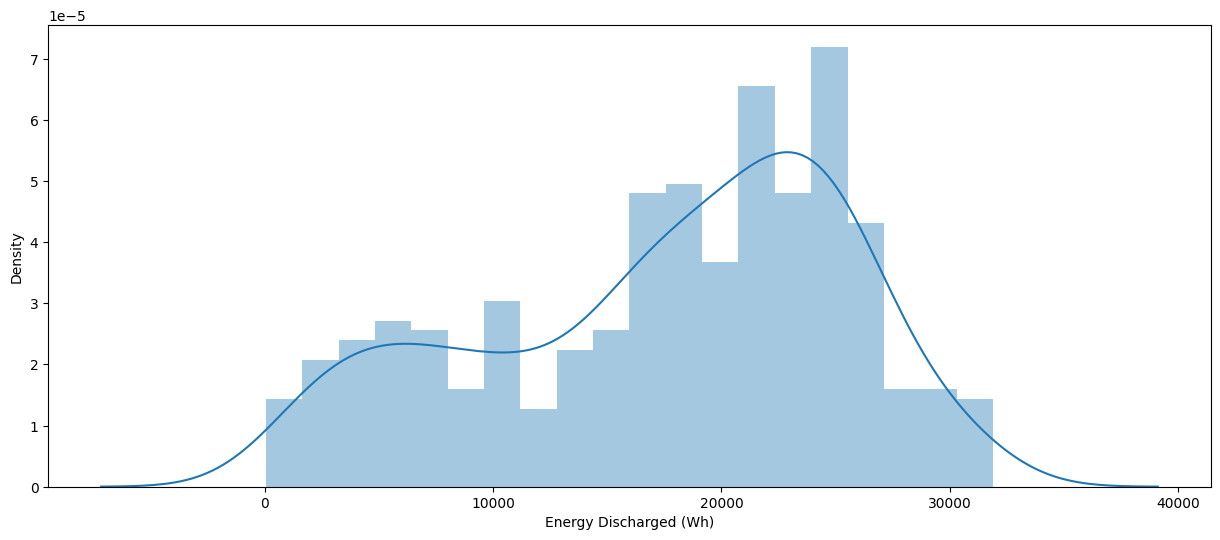

In [ ]:
plt.figure(figsize=(15,6))
sns.distplot(numeric_columns['Energy Discharged (Wh)'], bins = 20, kde = True)
plt.show()

In [5]:
numeric_columns.isnull().sum()

Energy Discharged (Wh)      0
Maximum Temperature         0
Minimum Temperature         0
Temperature                 0
Wind Chill                206
Heat Index                315
Precipitation               0
Snow                        0
Snow Depth                  0
Wind Speed                  0
Wind Direction              0
Wind Gust                 185
Visibility                  0
Cloud Cover                 0
Relative Humidity           0
dtype: int64

vedo che ci sono molti missing values, per cui li sostitiosco con le medie

In [6]:
print(solar['Wind Chill'].mean())
print(solar['Heat Index'].mean())
print(solar['Wind Gust'].mean())

32.13155080213903
85.84358974358975
26.619230769230764


In [6]:
numeric_columns.loc[numeric_columns['Wind Chill'].isnull(),'Wind Chill']=32.13
numeric_columns.loc[numeric_columns['Heat Index'].isnull(),'Heat Index']=85.84
numeric_columns.loc[numeric_columns['Wind Gust'].isnull(),'Wind Gust']=26.61
numeric_columns.isnull().sum()

Energy Discharged (Wh)    0
Maximum Temperature       0
Minimum Temperature       0
Temperature               0
Wind Chill                0
Heat Index                0
Precipitation             0
Snow                      0
Snow Depth                0
Wind Speed                0
Wind Direction            0
Wind Gust                 0
Visibility                0
Cloud Cover               0
Relative Humidity         0
dtype: int64

<Figure size 1600x600 with 0 Axes>

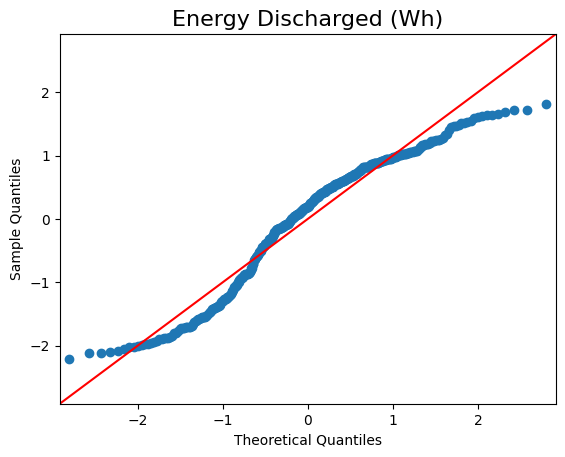

<Figure size 1600x600 with 0 Axes>

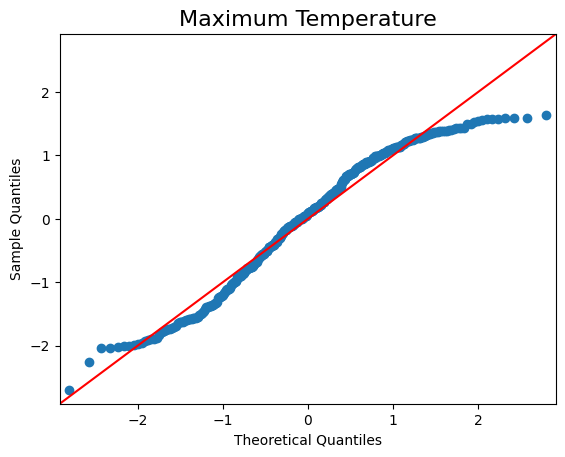

<Figure size 1600x600 with 0 Axes>

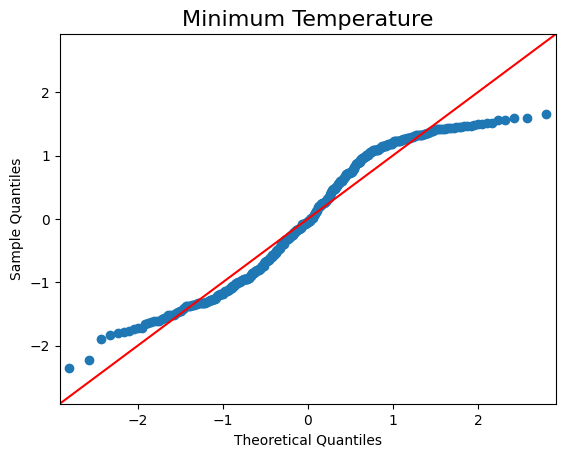

<Figure size 1600x600 with 0 Axes>

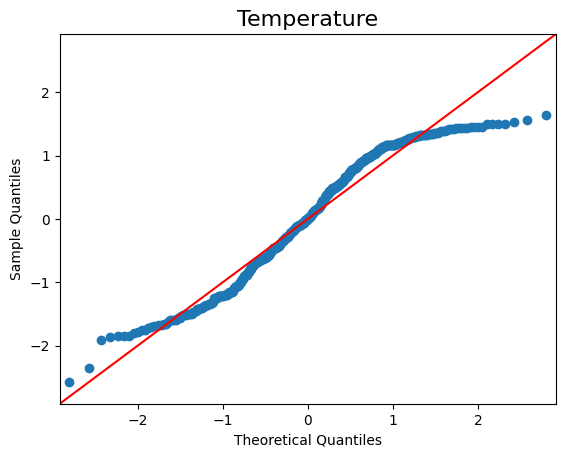

<Figure size 1600x600 with 0 Axes>

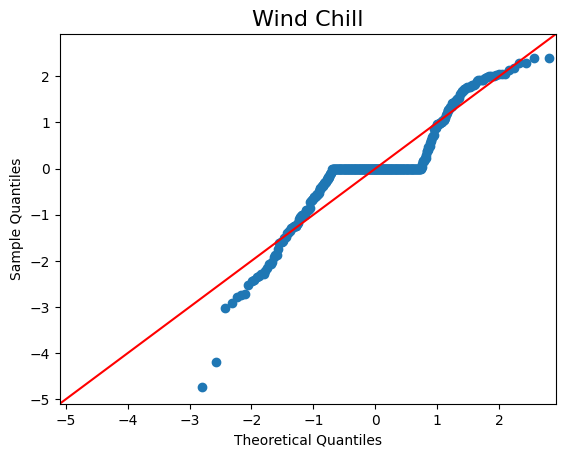

<Figure size 1600x600 with 0 Axes>

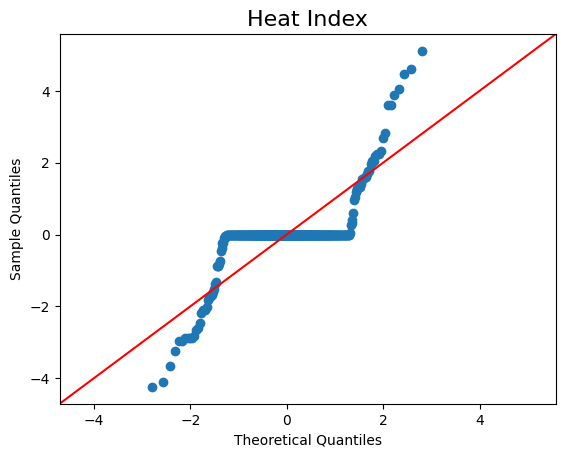

<Figure size 1600x600 with 0 Axes>

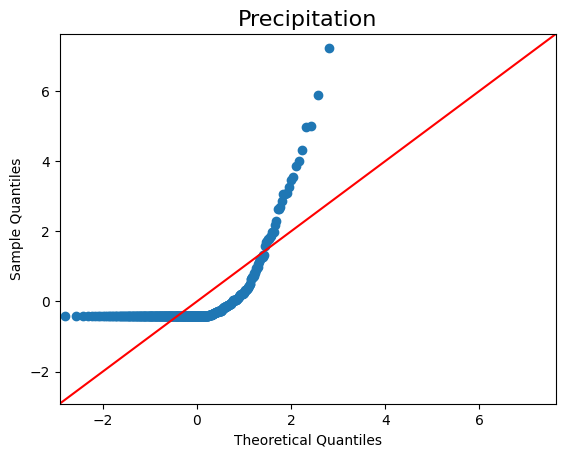

<Figure size 1600x600 with 0 Axes>

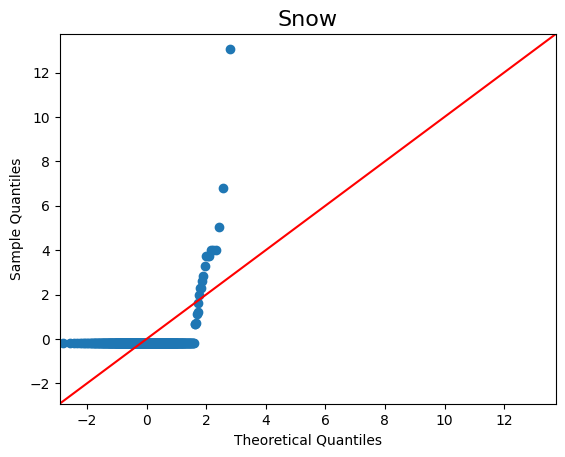

<Figure size 1600x600 with 0 Axes>

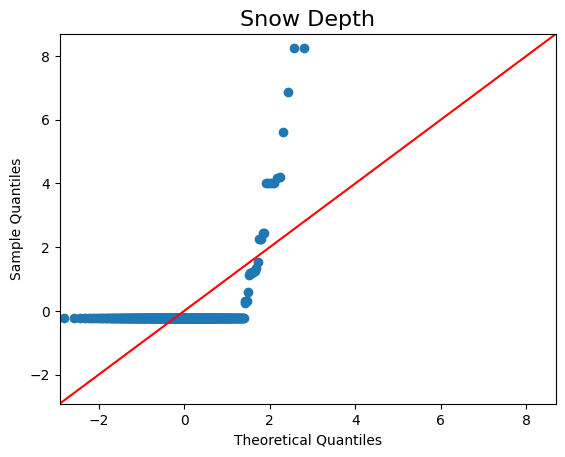

<Figure size 1600x600 with 0 Axes>

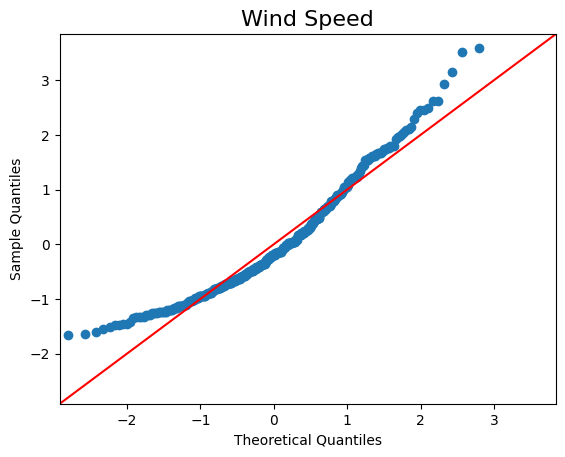

<Figure size 1600x600 with 0 Axes>

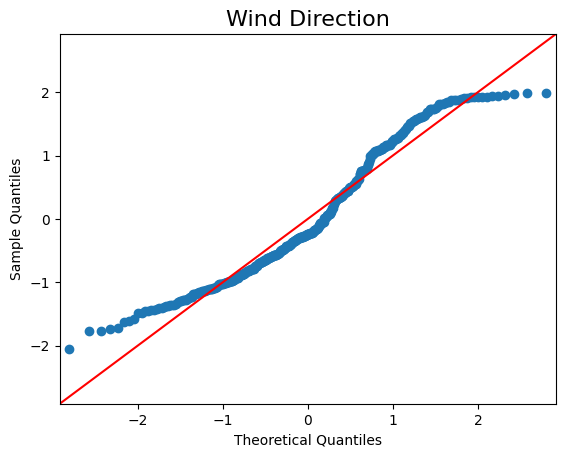

<Figure size 1600x600 with 0 Axes>

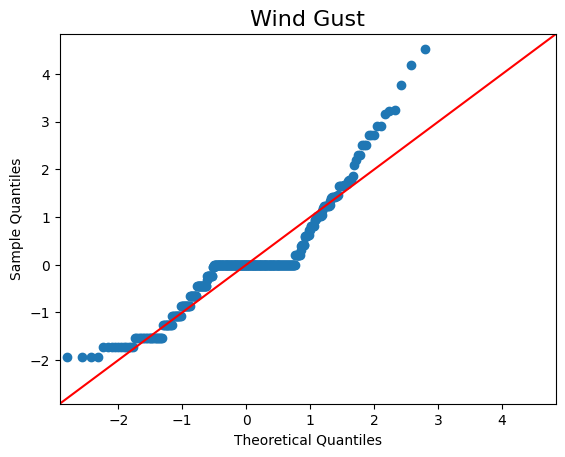

<Figure size 1600x600 with 0 Axes>

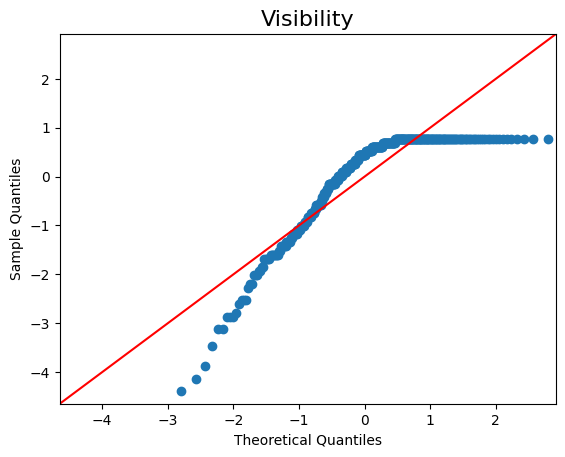

<Figure size 1600x600 with 0 Axes>

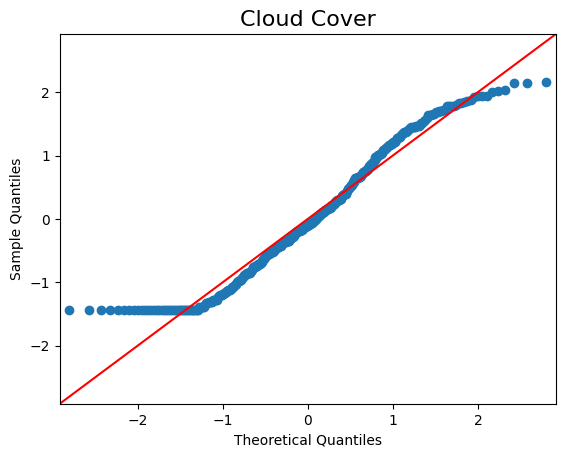

<Figure size 1600x600 with 0 Axes>

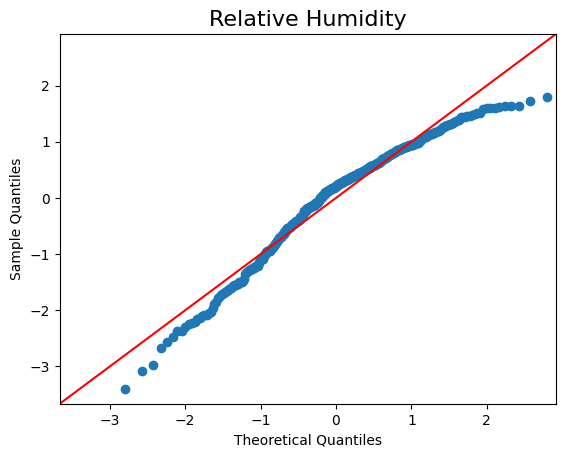

In [ ]:
#vediamo se la distribuzione dei valori delle feautures può essere assimilabile ad un gaussiana

for col in numeric_columns.columns:
        plt.figure(figsize=(16, 6))
        sm.qqplot(numeric_columns[col], line='45', fit=True)
        plt.title(col, size=16)
        plt.show()

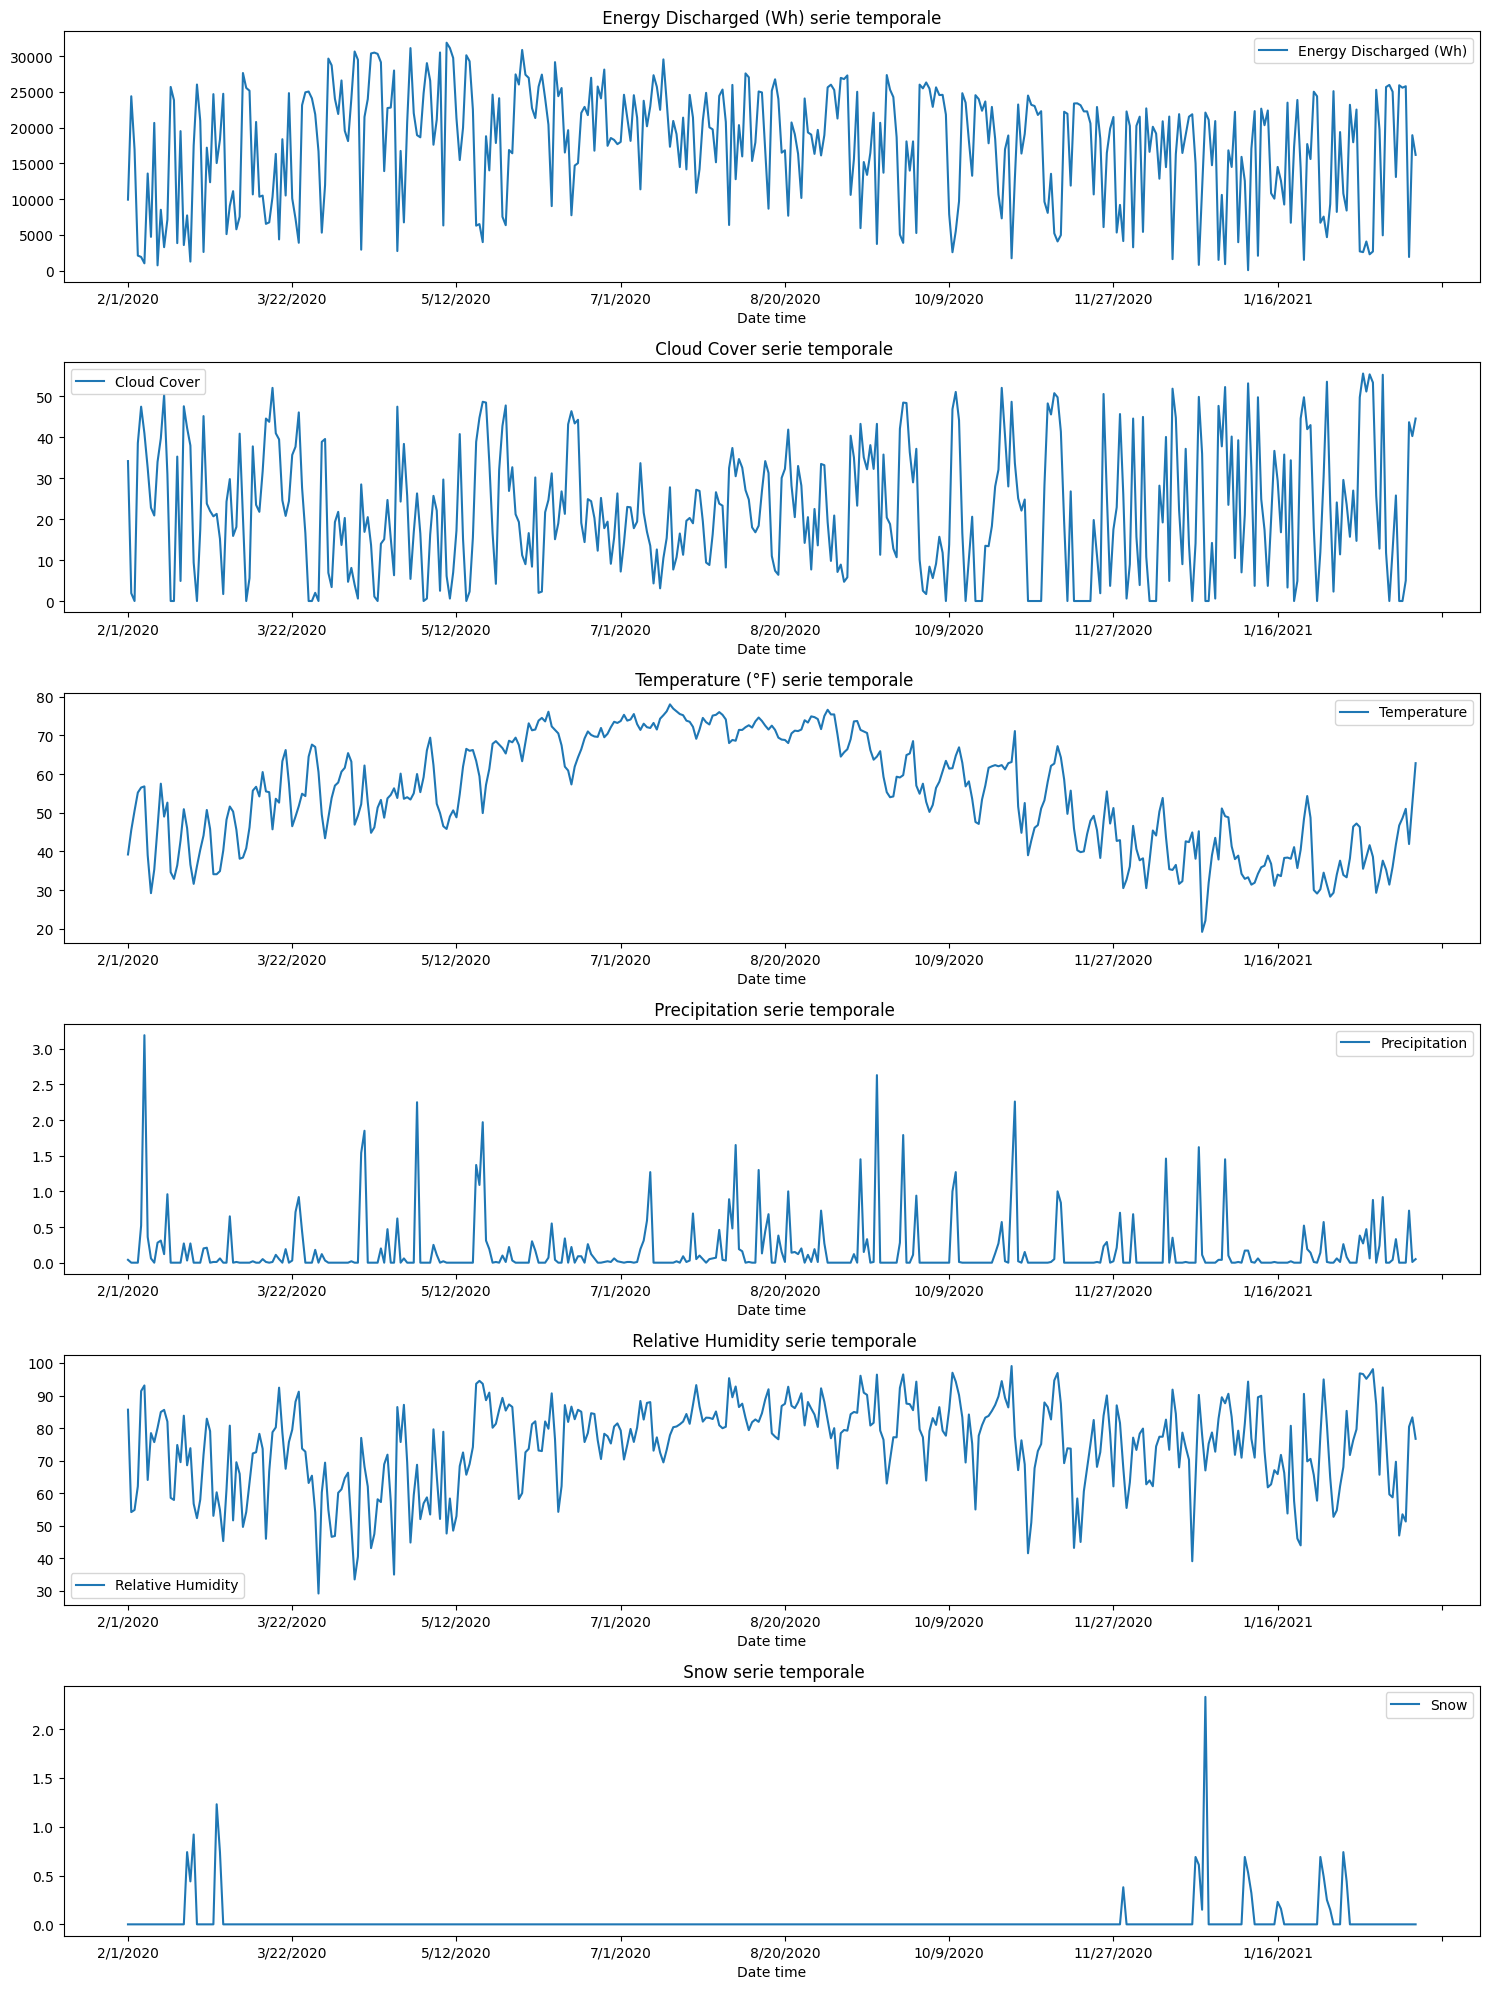

In [ ]:
#vediamo le serie temporali delle principali features

fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15, 20))
solar.plot(x='Date time', y='Energy Discharged (Wh)', ax=axes[0], title=" Energy Discharged (Wh) serie temporale ")
solar.plot(x='Date time', y='Cloud Cover', ax=axes[1], title=" Cloud Cover serie temporale")
solar.plot(x='Date time', y='Temperature', ax=axes[2], title=" Temperature (°F) serie temporale")
solar.plot(x='Date time', y='Precipitation', ax=axes[3], title=" Precipitation serie temporale")
solar.plot(x='Date time', y='Relative Humidity', ax=axes[4], title=" Relative Humidity serie temporale")
solar.plot(x='Date time', y='Snow', ax=axes[5], title=" Snow serie temporale")

plt.tight_layout()
plt.show()

**PRE-PROCESSING**

In alcune celle precedenti sono stati gestiti dei valori Nan per la variabile numeric_columns utile a vedere alcune informazioni di carattere statistico. In questo caso rifaremo lo steesso procedimento sulla variabile solar, applicando anche il label encoding alla feature conditions perchè questa è una stringa e vogliamo che gli algoritmi successivi lavorino solo con features numeriche

In [8]:
solar.isnull().sum()

Name                        0
Date time                   0
Energy Discharged (Wh)      0
Maximum Temperature         0
Minimum Temperature         0
Temperature                 0
Wind Chill                206
Heat Index                315
Precipitation               0
Snow                        0
Snow Depth                  0
Wind Speed                  0
Wind Direction              0
Wind Gust                 185
Visibility                  0
Cloud Cover                 0
Relative Humidity           0
Conditions                  0
dtype: int64

In [7]:
solar=solar.drop(['Date time','Conditions','Name'], axis=1)
solar.isnull().sum()

Energy Discharged (Wh)      0
Maximum Temperature         0
Minimum Temperature         0
Temperature                 0
Wind Chill                206
Heat Index                315
Precipitation               0
Snow                        0
Snow Depth                  0
Wind Speed                  0
Wind Direction              0
Wind Gust                 185
Visibility                  0
Cloud Cover                 0
Relative Humidity           0
dtype: int64

In [8]:
solar.loc[solar['Wind Chill'].isnull(),'Wind Chill']=32.13
solar.loc[solar['Heat Index'].isnull(),'Heat Index']=85.84
solar.loc[solar['Wind Gust'].isnull(),'Wind Gust']=26.61
solar.isnull().sum()

Energy Discharged (Wh)    0
Maximum Temperature       0
Minimum Temperature       0
Temperature               0
Wind Chill                0
Heat Index                0
Precipitation             0
Snow                      0
Snow Depth                0
Wind Speed                0
Wind Direction            0
Wind Gust                 0
Visibility                0
Cloud Cover               0
Relative Humidity         0
dtype: int64

Divisione in training e test set

In [9]:
from sklearn.model_selection import train_test_split


X = solar.drop(['Energy Discharged (Wh)'], axis = 1)  #tolgo il target della predizione e lascio tutte le altre perchè sono dati su condizioni atmosferiche
y = solar['Energy Discharged (Wh)'] #il target da predirre

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

**PREDIZIONE**

Vediamo alcuni modelli di regressione

Modello PLS

In [10]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score  #queste sono metriche per valutare il modello

# facciamo il training del modello  PLS
pls = PLSRegression()
pls.fit(X_train, y_train)

# predizione e valutazione dei risultati Predict and evaluate on the test set
y_pred = pls.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
pls_score = pls.score(X_test, y_test)
print(f"Score del modello PLS : {pls_score*100:.4f} %")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

Score del modello PLS : 58.5251 %
RMSE: 5118.0611417040045
R²: 0.5852510396397367


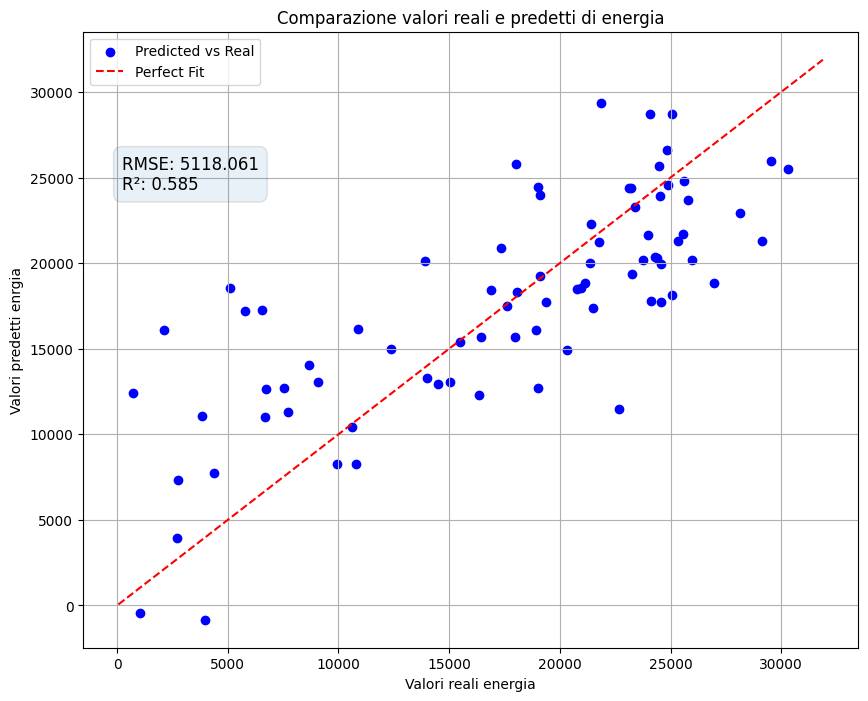

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Real')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', label='Perfect Fit')
plt.text(x=0.05, y=0.8, s=f'RMSE: {rmse:.3f}\nR²: {r2:.3f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', alpha=0.1))

plt.xlabel('Valori reali energia')
plt.ylabel('Valori predetti enrgia')
plt.title('Comparazione valori reali e predetti di energia')
plt.legend()
plt.grid(True)
plt.show()

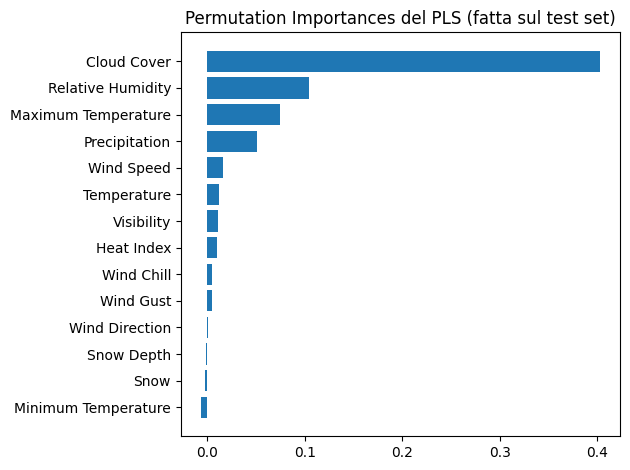

In [11]:
from sklearn.inspection import permutation_importance

#calcolo la feature importance con i test di permutazione
results = permutation_importance(pls, X_train, y_train, scoring='r2', n_jobs=-1)
importance = results.importances_mean  #prende l'importanza
sorted_idx = results.importances_mean.argsort()

#plotto i risultati
fig, ax = plt.subplots()
ax.barh(X.columns[sorted_idx], results.importances[sorted_idx].mean(axis=1).T)
ax.set_title("Permutation Importances del PLS (fatta sul test set)")
fig.tight_layout()
plt.show()

In [12]:
sorted_idx = results.importances_mean.argsort()[::-1]  # metto in ordine decrescente
for idx in sorted_idx:
    print(f"{X.columns[idx]}: {results.importances_mean[idx]:.4f}")

Cloud Cover: 0.4027
Relative Humidity: 0.1040
Maximum Temperature: 0.0748
Precipitation: 0.0507
Wind Speed: 0.0155
Temperature: 0.0117
Visibility: 0.0113
Heat Index: 0.0093
Wind Chill: 0.0050
Wind Gust: 0.0042
Wind Direction: 0.0006
Snow Depth: -0.0013
Snow: -0.0022
Minimum Temperature: -0.0070


visto che il dataset è di piccole dimensioni , per migliorare le performance del modello vediamo l'approccio cross validaton se produce effetti positivi

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pls, X_train, y_train, cv=10) #cv è il numero di iterazioni

print("%0.2f score del modello con una deviazione  standard di %0.2f" % (scores.mean(), scores.std()))

0.65 score del modello con una deviazione  standard di 0.07


Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

lr_score = lr_model.score(X_test, y_test)
print(f"Score della regressione lineare: {lr_score*100:.4f} %")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

Score della regressione lineare: 64.0107 %
RMSE: 4767.598779224524
R²: 0.6401066961247406


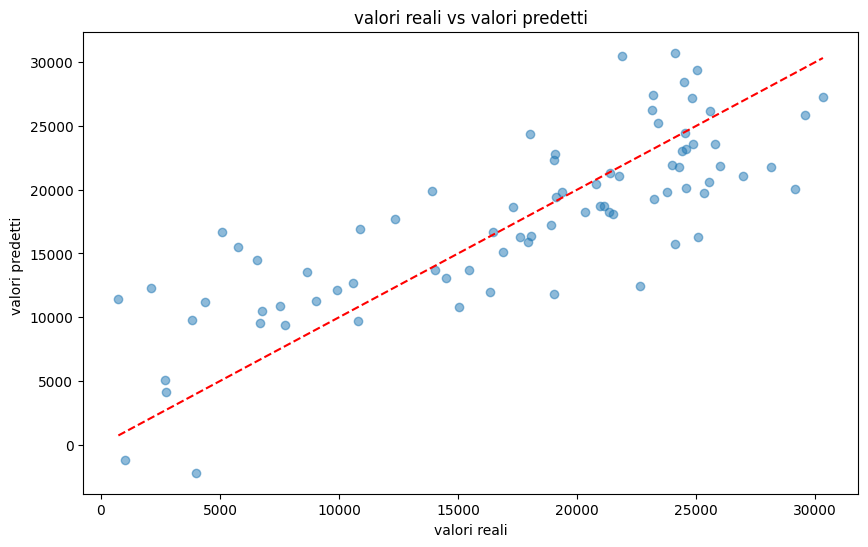

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # linea per la predizione pergetta
plt.xlabel('valori reali')
plt.ylabel('valori predetti ')
plt.title('valori reali vs valori predetti')
plt.show()

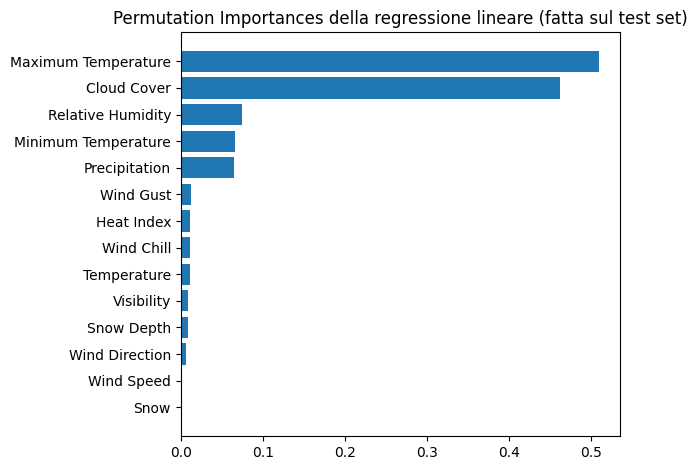

In [ ]:
results = permutation_importance(lr_model, X_train, y_train, scoring='r2', n_jobs=-1)
importance = results.importances_mean  #prende l'importanza
sorted_idx = results.importances_mean.argsort()

#plotto i risultati
fig, ax = plt.subplots()
ax.barh(X.columns[sorted_idx], results.importances[sorted_idx].mean(axis=1).T)
ax.set_title("Permutation Importances della regressione lineare (fatta sul test set)")
fig.tight_layout()
plt.show()

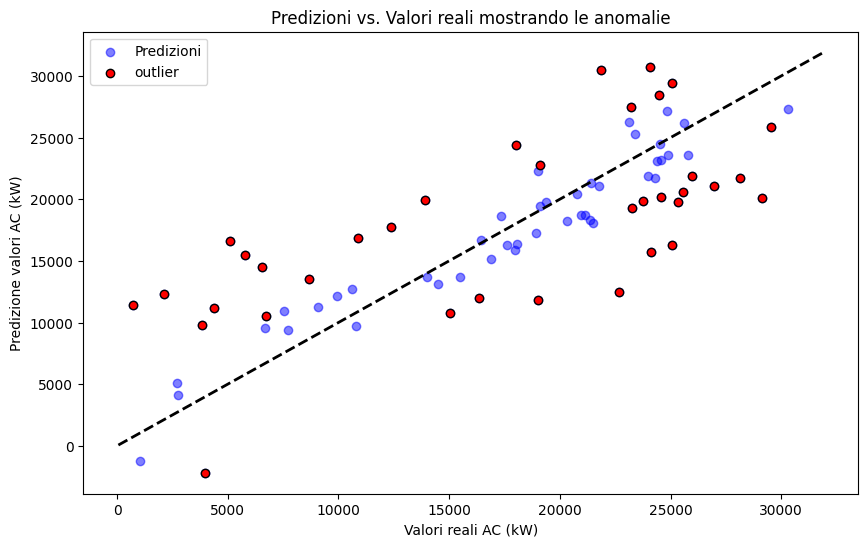

In [ ]:
#imposto una fascia di tolleranza per rilevare le anomalie
tolerance = 3500
errors = np.abs(y_test - y_pred)
anomalies = errors > tolerance


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predizioni')
plt.scatter(y_test[anomalies], y_pred[anomalies], color='red', label='outlier', edgecolor='k')
plt.xlabel('Valori reali ')
plt.ylabel('Predizione valori ')
plt.title('Predizioni vs. Valori reali mostrando le anomalie')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.legend()
plt.show()

In [ ]:
scores = cross_val_score(lr_model, X_train, y_train, cv=10) #cv è il numero di iterazioni

print("%0.2f score del modello con dev.  standard di %0.2f" % (scores.mean(), scores.std()))

0.68 score del modello con dev.  standard di 0.09


KNN

In [ ]:
from sklearn import neighbors

#mi serve per salvarmi i risultati in base al parametro k
score_list = []
n_neighbors_list = []

# uso il ciclo for per vedere il miglior valore del parametro per il modello
for i in range(1, 21):
    knn = neighbors.KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)

    knn_score = knn.score(X_test, y_test)

    score_list.append(knn_score)
    n_neighbors_list.append(i)

best_n_neighbor = n_neighbors_list[score_list.index(max(score_list))]
print(f"Miglior risultato del knn è con parametro  {best_n_neighbor} e vale  {max(score_list)*100:.4f} %")

Miglior risultato del knn è con parametro  3 e vale  65.0474 %


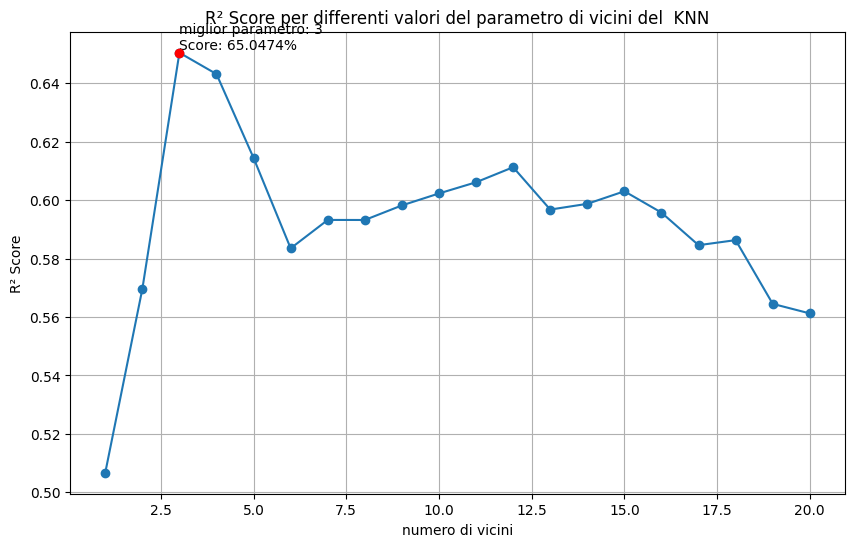

miglior risultato è 65.0474 in corrispondenza di  3 come parametro %


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_list, score_list, marker='o')
plt.xlabel('numero di vicini')
plt.ylabel('R² Score')
plt.title('R² Score per differenti valori del parametro di vicini del  KNN')
plt.grid(True)

# Highlight the best n_neighbors
best_n_neighbor = n_neighbors_list[score_list.index(max(score_list))]
best_score = max(score_list)
plt.scatter([best_n_neighbor], [best_score], color='red', zorder=5)
plt.text(best_n_neighbor, best_score, f'miglior parametro: {best_n_neighbor}\nScore: {best_score*100:.4f}%',
         horizontalalignment='left', verticalalignment='bottom')

plt.show()

print(f"miglior risultato è {best_score*100:.4f} in corrispondenza di  {best_n_neighbor} come parametro %")

Alberi decisionali

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

y_pred = dtr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

dtr_score = dtr.score(X_test, y_test)
print(f"Score dell'albero: {dtr_score*100:.4f} %")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

Score dell'albero: 38.9080 %
RMSE: 6211.621037329338
R²: 0.38908010169869645


Text(0.5, 1.0, ' feautures importance dell albero decisionale è  ')

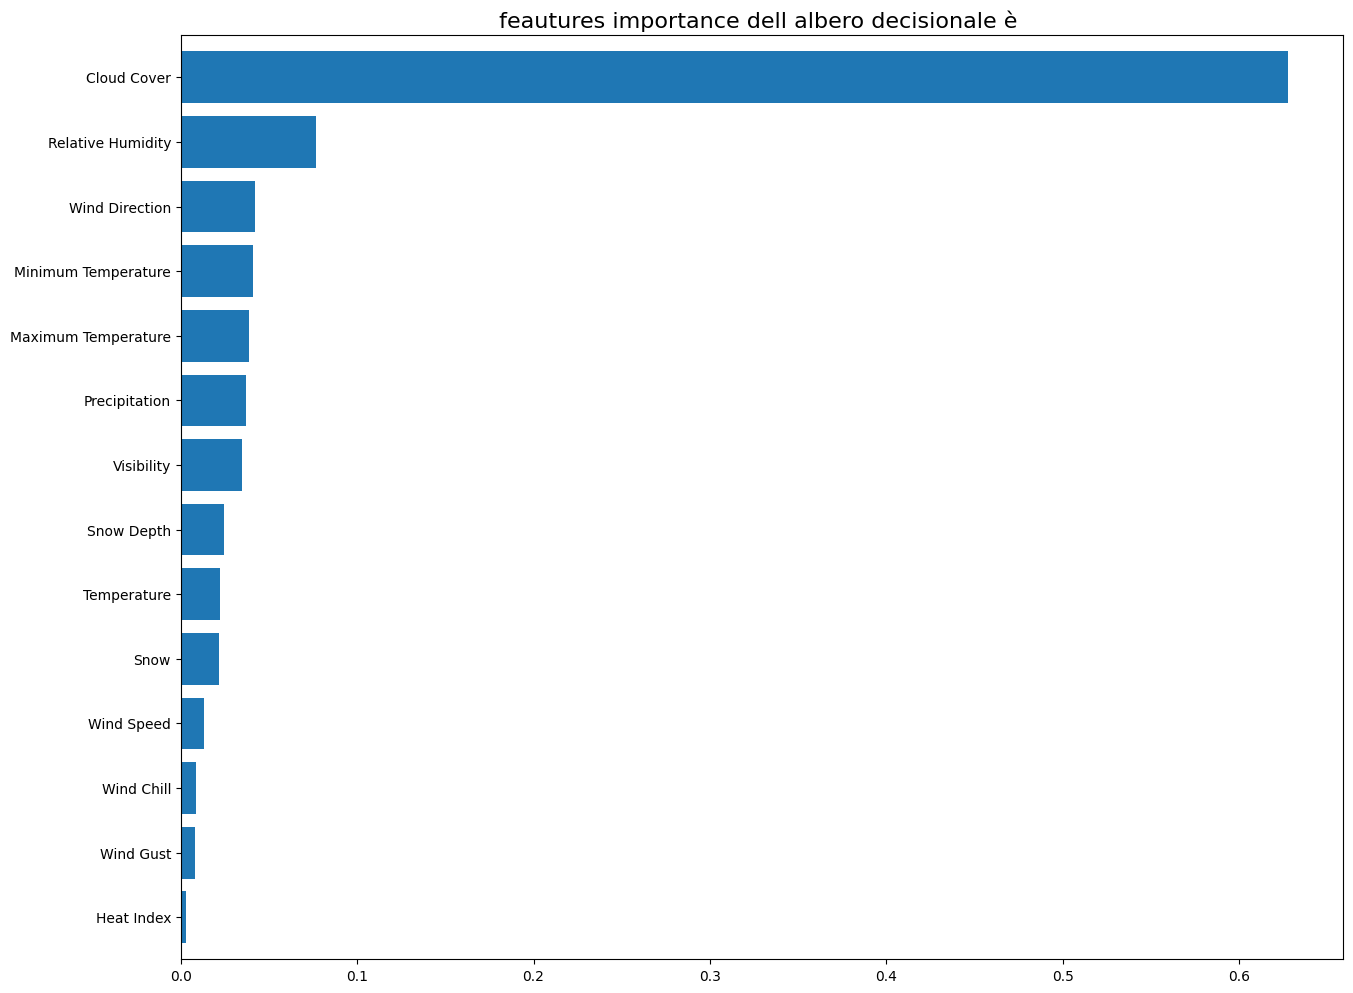

In [ ]:
#stampo la feature importance che per gli alberi è una proprietà che posso ricavare senza test di permutazione
plt.figure(figsize=(15,12))
pd.Series(dtr.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8)
plt.title(' feautures importance dell albero decisionale è  ', size=16)

di seguito vediamo graficamente come il modello ad albero non sia buono a livello di performance  per questo dataset

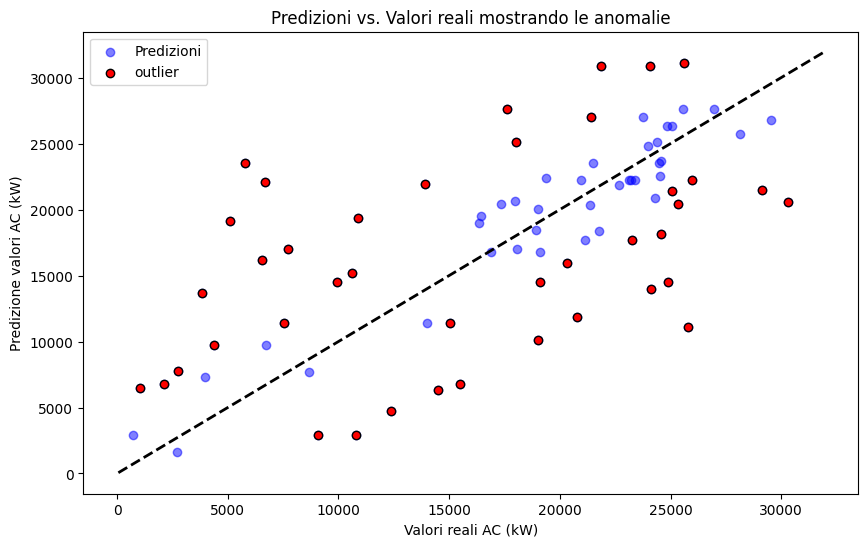

In [ ]:
#imposto una fascia di tolleranza per rilevare le anomalie
tolerance = 3500
errors = np.abs(y_test - y_pred)
anomalies = errors > tolerance


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predizioni')
plt.scatter(y_test[anomalies], y_pred[anomalies], color='red', label='outlier', edgecolor='k')
plt.xlabel('Valori reali ')
plt.ylabel('Predizione valori ')
plt.title('Predizioni vs. Valori reali mostrando le anomalie')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.legend()
plt.show()

In [ ]:
scores = cross_val_score(dtr, X_train, y_train, cv=10) #cv è il numero di iterazioni

print("%0.2f score del modello con dev.  standard di %0.2f" % (scores.mean(), scores.std()))

0.36 score del modello con dev.  standard di 0.16


Random Forest

In [13]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

y_pred = rfr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

rfr_score = rfr.score(X_test, y_test)
print(f"Score del random forest: {rfr_score*100:.4f} %")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

Score del random forest: 68.5912 %
RMSE: 4453.8766840657545
R²: 0.685912434502147


Text(0.5, 1.0, ' feautures importance del random forest  è  ')

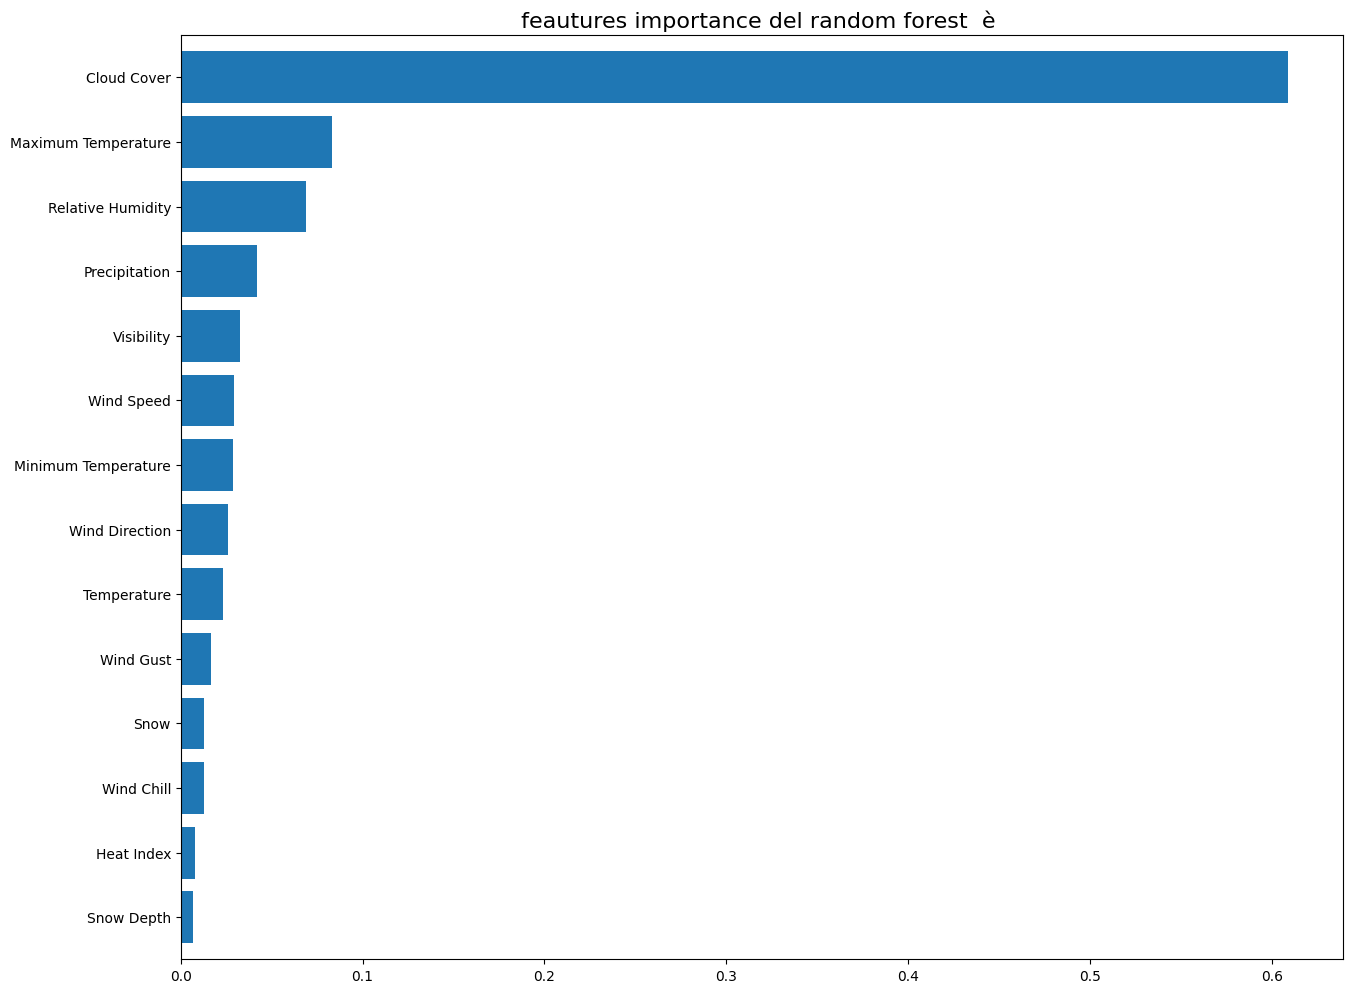

In [22]:
plt.figure(figsize=(15,12))
pd.Series(rfr.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8)
plt.title(' feautures importance del random forest  è  ', size=16)

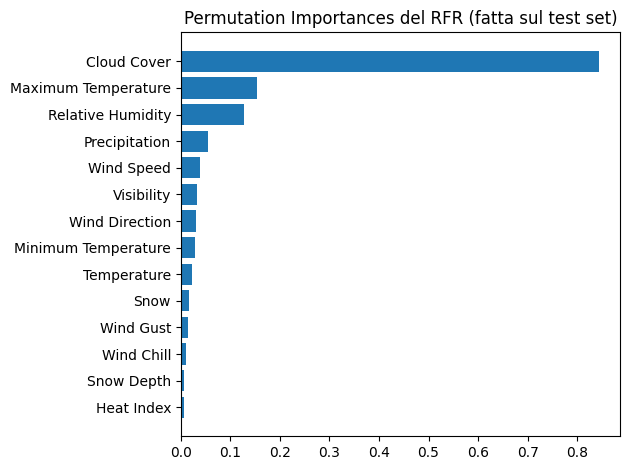

In [15]:
#calcolo la feature importance con i test di permutazione
results = permutation_importance(rfr, X_train, y_train, scoring='r2', n_jobs=-1)
importance = results.importances_mean  #prende l'importanza
sorted_idx = results.importances_mean.argsort()

#plotto i risultati
fig, ax = plt.subplots()
ax.barh(X.columns[sorted_idx], results.importances[sorted_idx].mean(axis=1).T)
ax.set_title("Permutation Importances del RFR (fatta sul test set)")
fig.tight_layout()
plt.show()


In [16]:
sorted_idx = results.importances_mean.argsort()[::-1]  # metto in ordine decrescente
for idx in sorted_idx:
    print(f"{X.columns[idx]}: {results.importances_mean[idx]:.4f}")

Cloud Cover: 0.8441
Maximum Temperature: 0.1547
Relative Humidity: 0.1268
Precipitation: 0.0541
Wind Speed: 0.0380
Visibility: 0.0328
Wind Direction: 0.0300
Minimum Temperature: 0.0286
Temperature: 0.0224
Snow: 0.0176
Wind Gust: 0.0147
Wind Chill: 0.0101
Snow Depth: 0.0068
Heat Index: 0.0065


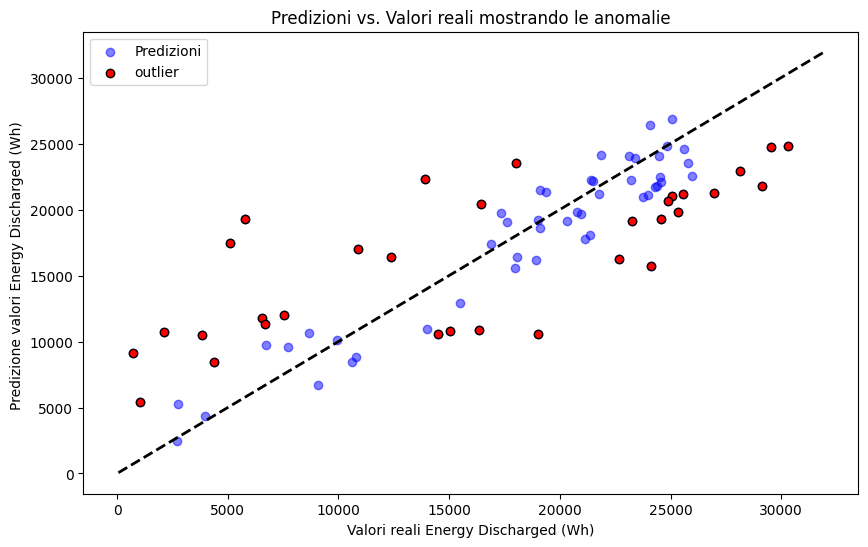

In [ ]:
#imposto una fascia di tolleranza per rilevare le anomalie
tolerance = 3500
errors = np.abs(y_test - y_pred)
anomalies = errors > tolerance


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predizioni')
plt.scatter(y_test[anomalies], y_pred[anomalies], color='red', label='outlier', edgecolor='k')
plt.xlabel('Valori reali Energy Discharged (Wh)')
plt.ylabel('Predizione valori Energy Discharged (Wh) ')
plt.title('Predizioni vs. Valori reali mostrando le anomalie')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.legend()
plt.show()

In [ ]:
scores = cross_val_score(rfr, X_train, y_train, cv=10) #cv è il numero di iterazioni

print("%0.2f score del modello con dev.  standard di %0.2f" % (scores.mean(), scores.std()))

0.65 score del modello con dev.  standard di 0.06


Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# dichiarazione e trainingraining del modello
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train, y_train)

# valutazione del  modello
y_pred = gb_regressor.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
gb_score = gb_regressor.score(X_test, y_test)


print(f"Score del gradient boost: {gb_score*100:.4f} %")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

Score del gradient boost: 65.8224 %
RMSE: 4646.043866910169
R²: 0.6582244597287649


Text(0.5, 1.0, ' feautures importance del gradient boost  è  ')

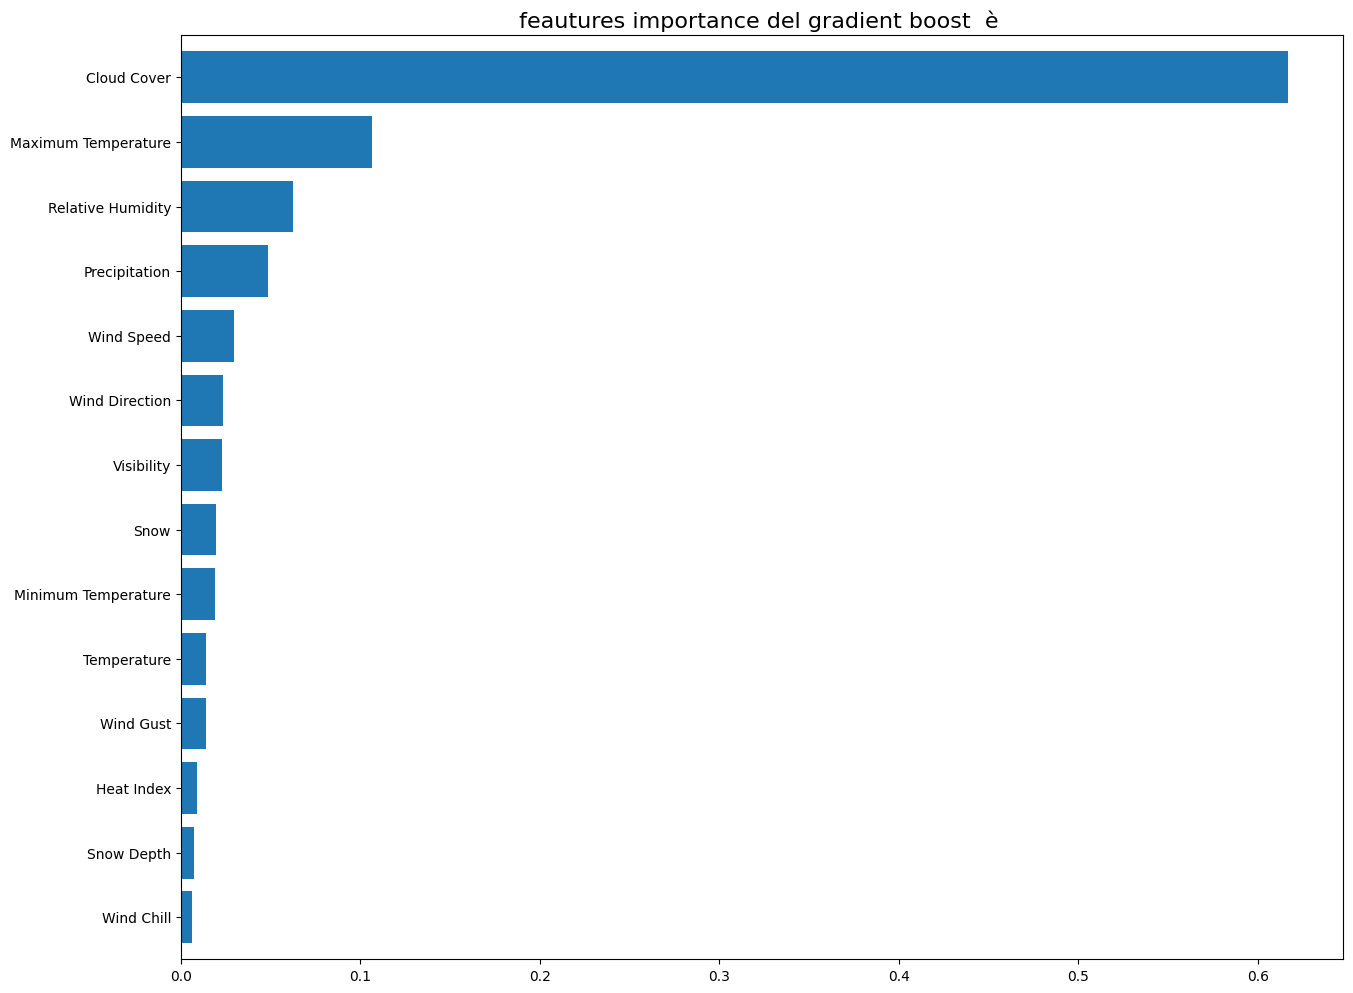

In [ ]:
plt.figure(figsize=(15,12))
pd.Series(gb_regressor.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8)
plt.title(' feautures importance del gradient boost  è  ', size=16)

In [ ]:
scores = cross_val_score(gb_regressor, X_train, y_train, cv=10) #cv è il numero di iterazioni

print("%0.2f score del modello con dev.  standard di %0.2f" % (scores.mean(), scores.std()))

0.63 score del modello con dev.  standard di 0.06


Bayesian Ridge Regression

In [ ]:
from sklearn import linear_model

br = linear_model.BayesianRidge()
br.fit(X_train,y_train)

y_pred = br.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

br_score =br.score(X_test, y_test)
print(f"Score bayesian ridge regression: {br_score*100:.4f} %")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

Score bayesian ridge regression: 64.4550 %
RMSE: 4738.079340106807
R²: 0.6445495862401565


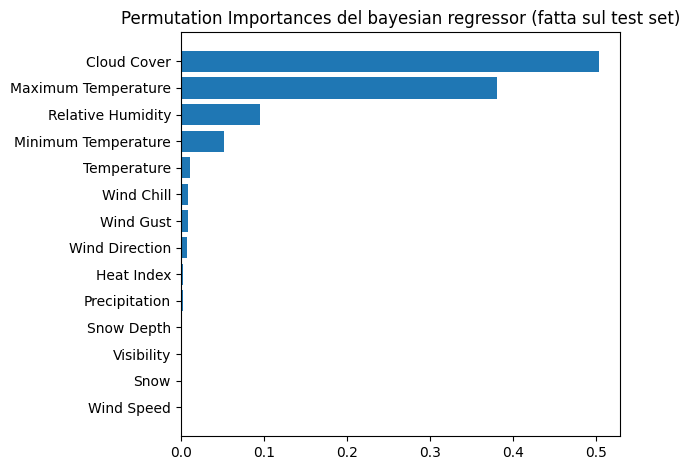

In [ ]:
#calcolo la feature importance con i test di permutazione
results = permutation_importance(br, X_train, y_train, scoring='r2', n_jobs=-1)
importance = results.importances_mean  #prende l'importanza
sorted_idx = results.importances_mean.argsort()

#plotto i risultati
fig, ax = plt.subplots()
ax.barh(X.columns[sorted_idx], results.importances[sorted_idx].mean(axis=1).T)
ax.set_title("Permutation Importances del bayesian regressor (fatta sul test set)")
fig.tight_layout()
plt.show()

In [ ]:
scores = cross_val_score(br, X_train, y_train, cv=10) #cv è il numero di iterazioni

print("%0.2f score del modello con dev.  standard di %0.2f" % (scores.mean(), scores.std()))

0.66 score del modello con dev.  standard di 0.07


Comparazione dei modelli

Dai modelli precedenti prendiamo i risultati e li compariamo con un grafico

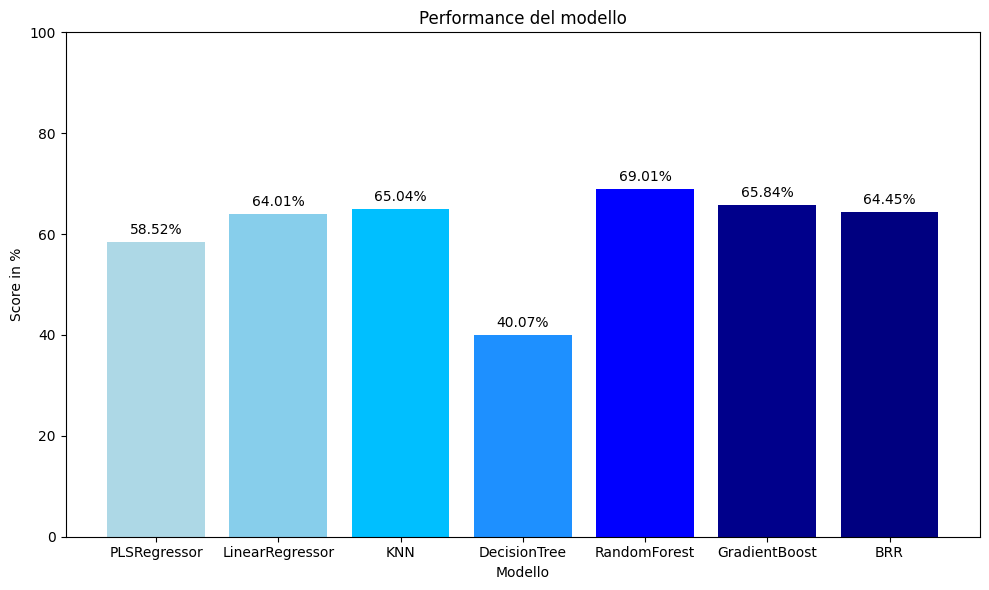

In [ ]:
models = ['PLSRegressor', 'LinearRegressor','KNN','DecisionTree', 'RandomForest','GradientBoost','BRR']

# scores corrispettivi dei modelli precedentemente utilizzati ed elencati
scores = [58.52, 64.01,65.04,40.07,69.01,65.84,64.45]

# Creazione di un bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, scores, color = ['lightblue', 'skyblue', 'deepskyblue', 'dodgerblue','blue','darkblue','navy'])
plt.ylim(0, 100)  # metto asse y settato tra 0 e 100
plt.title('Performance del modello')
plt.xlabel('Modello')
plt.ylabel('Score in %')

# metto gli socres in alto sopra le barre del grafico
for i, score in enumerate(scores):
    plt.text(i, score + 1, f"{score:.2f}%", ha='center', va='bottom')

# mostra il grafico
plt.tight_layout()
plt.show()